# Advanced Logistic Regression

## Importing necessary libraries

In [308]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import r2_score, mean_squared_error
# To ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [309]:
# Next lets read the dataset
# reading the dataset
df = pd.read_csv("train.csv", encoding = 'utf-8')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [310]:
#Checking the details about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [311]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,"1,460.00","1,460.00","1,201.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,452.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,379.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00","1,460.00"
mean,730.50,56.90,70.05,"10,516.83",6.10,5.58,"1,971.27","1,984.87",103.69,443.64,46.55,567.24,"1,057.43","1,162.63",346.99,5.84,"1,515.46",0.43,0.06,1.57,0.38,2.87,1.05,6.52,0.61,"1,978.51",1.77,472.98,94.24,46.66,21.95,3.41,15.06,2.76,43.49,6.32,"2,007.82","180,921.20"
std,421.61,42.30,24.28,"9,981.26",1.38,1.11,30.20,20.65,181.07,456.10,161.32,441.87,438.71,386.59,436.53,48.62,525.48,0.52,0.24,0.55,0.50,0.82,0.22,1.63,0.64,24.69,0.75,213.80,125.34,66.26,61.12,29.32,55.76,40.18,496.12,2.70,1.33,"79,442.50"
min,1.00,20.00,21.00,"1,300.00",1.00,1.00,"1,872.00","1,950.00",0.00,0.00,0.00,0.00,0.00,334.00,0.00,0.00,334.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,"1,900.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,"2,006.00","34,900.00"
25%,365.75,20.00,59.00,"7,553.50",5.00,5.00,"1,954.00","1,967.00",0.00,0.00,0.00,223.00,795.75,882.00,0.00,0.00,"1,129.50",0.00,0.00,1.00,0.00,2.00,1.00,5.00,0.00,"1,961.00",1.00,334.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.00,"2,007.00","129,975.00"
50%,730.50,50.00,69.00,"9,478.50",6.00,5.00,"1,973.00","1,994.00",0.00,383.50,0.00,477.50,991.50,"1,087.00",0.00,0.00,"1,464.00",0.00,0.00,2.00,0.00,3.00,1.00,6.00,1.00,"1,980.00",2.00,480.00,0.00,25.00,0.00,0.00,0.00,0.00,0.00,6.00,"2,008.00","163,000.00"
75%,"1,095.25",70.00,80.00,"11,601.50",7.00,6.00,"2,000.00","2,004.00",166.00,712.25,0.00,808.00,"1,298.25","1,391.25",728.00,0.00,"1,776.75",1.00,0.00,2.00,1.00,3.00,1.00,7.00,1.00,"2,002.00",2.00,576.00,168.00,68.00,0.00,0.00,0.00,0.00,0.00,8.00,"2,009.00","214,000.00"
max,"1,460.00",190.00,313.00,"215,245.00",10.00,9.00,"2,010.00","2,010.00","1,600.00","5,644.00","1,474.00","2,336.00","6,110.00","4,692.00","2,065.00",572.00,"5,642.00",3.00,2.00,3.00,2.00,8.00,3.00,14.00,3.00,"2,010.00",4.00,"1,418.00",857.00,547.00,552.00,508.00,480.00,738.00,"15,500.00",12.00,"2,010.00","755,000.00"


In [312]:
df.shape

(1460, 81)

From the data dictionary, we understand that there are some categorical variables with numerical values, so it is best to replace these with actual categorical values

MSSubClass,OverallQual, OverallCond has numerical values but these are categorical variables


Also LotFrontage and MasVnrArea columns can be converted to numerical type


In [313]:
df[['MSSubClass', 'OverallQual', 'OverallCond']] = df[['MSSubClass', 'OverallQual', 'OverallCond']].astype('object')

In [314]:
df['LotFrontage'] = pd.to_numeric(df['LotFrontage'], errors='coerce')
df['MasVnrArea'] = pd.to_numeric(df['MasVnrArea'], errors='coerce')

In [315]:
df[['MSSubClass', 'OverallQual', 'OverallCond', 'LotFrontage', 'MasVnrArea']].dtypes

MSSubClass      object
OverallQual     object
OverallCond     object
LotFrontage    float64
MasVnrArea     float64
dtype: object

In [316]:
df.isnull().any()

Id               False
MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
Alley             True
LotShape         False
LandContour      False
Utilities        False
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType        True
MasVnrArea        True
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual          True
BsmtCond          True
BsmtExposure      True
BsmtFinType1      True
BsmtFinSF1       False
BsmtFinType2      True
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical        True
1stFlrSF   

## Missing Value treatment

In [317]:
df.columns[df.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [318]:
pd.options.display.max_rows = 1000

In [319]:
pd.options.display.max_columns = 200

In [320]:
def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))

missing(df)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
Utilities        0.00
YearRemodAdd     0.00
MSSubClass       0.00
Foundation       0.00
ExterCond        0.00
ExterQual        0.00
Exterior2nd      0.00
Exterior1st      0.00
RoofMatl         0.00
RoofStyle        0.00
YearBuilt        0.00
LotConfig        0.00
OverallCond      0.00
OverallQual      0.00
HouseStyle       0.00
BldgType         0.00
Condition2       0.00
BsmtFinSF1       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
Condition1       0.00
Neighborhood     0.00
LotShape         0.00
LandContour      0.00
LandSlope        0.00
SalePrice 

According to data definition, the columns can have nulls because the facility is lacking, which can affect price also. So we can replace these with 'None' so that python will not consider these as nan


In [321]:
imp_nulls=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond','GarageType',
           'GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual',
           ]


In [322]:
for i in imp_nulls:
    df[i].fillna("none",inplace=True)

In [323]:
missing(df)

LotFrontage     17.74
GarageYrBlt      5.55
MasVnrType       0.55
MasVnrArea       0.55
Electrical       0.07
SalePrice        0.00
ExterCond        0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
ExterQual        0.00
BsmtQual         0.00
Foundation       0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
YearRemodAdd     0.00
YearBuilt        0.00
TotalBsmtSF      0.00
Utilities        0.00
MSSubClass       0.00
MSZoning         0.00
LotArea          0.00
Street           0.00
Alley            0.00
LotShape         0.00
LandContour      0.00
LotConfig        0.00
OverallCond      0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
BsmtUnfSF        0.00
HeatingQC        0.00
Heating          0.00
ScreenPorch      0.00
GarageQual       0.00
GarageCond

Now the missing values seem to be in reasonable range.
Lets start with Visualizations

## Exploratory Data Analysis

In [324]:
#Extracting numeric variables
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_numeric

,Id,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,65.00,8450,2003,2003,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,"2,003.00",2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,80.00,9600,1976,1976,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,"1,976.00",2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,68.00,11250,2001,2002,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,"2,001.00",2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,60.00,9550,1915,1970,0.00,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,"1,998.00",3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,84.00,14260,2000,2000,350.00,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,"2,000.00",3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.00,7917,1999,2000,0.00,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,"1,999.00",2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,85.00,13175,1978,1988,119.00,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,"1,978.00",2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,66.00,9042,1941,2006,0.00,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,"1,941.00",1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,68.00,9717,1950,1996,0.00,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,"1,950.00",1,240,366,0,112,0,0,0,0,4,2010,142125


In [325]:
#Let us drop Id column
df_numeric = df_numeric.drop(['Id'], axis=1)
df_numeric.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [326]:
def relativeplot(x,y):
    plt.figure(figsize=(20, 8))
    sns.barplot(x, y, data= df)
    plt.title(y+" with respect to "+x)
    plt.xticks(rotation=90)

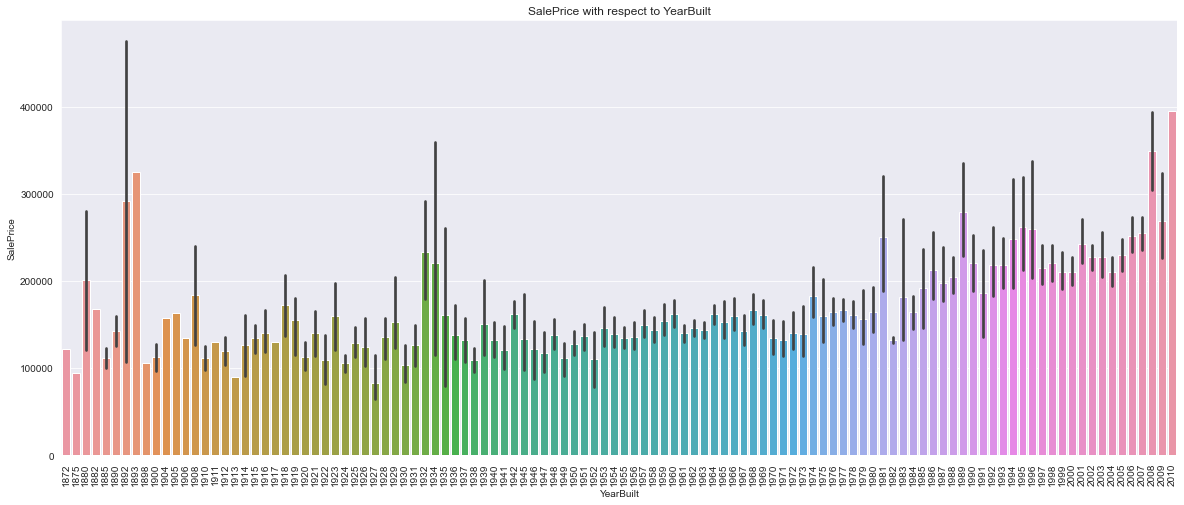

In [327]:
relativeplot('YearBuilt','SalePrice')

SalePrice is high for new houses

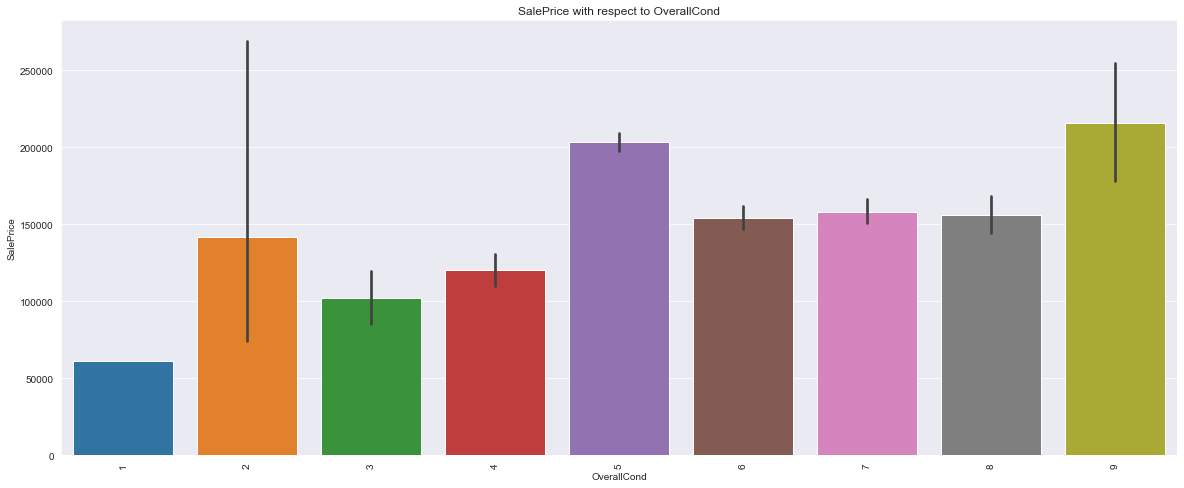

In [328]:
relativeplot('OverallCond','SalePrice')

    Prices are higher for  Excellent and Average houses

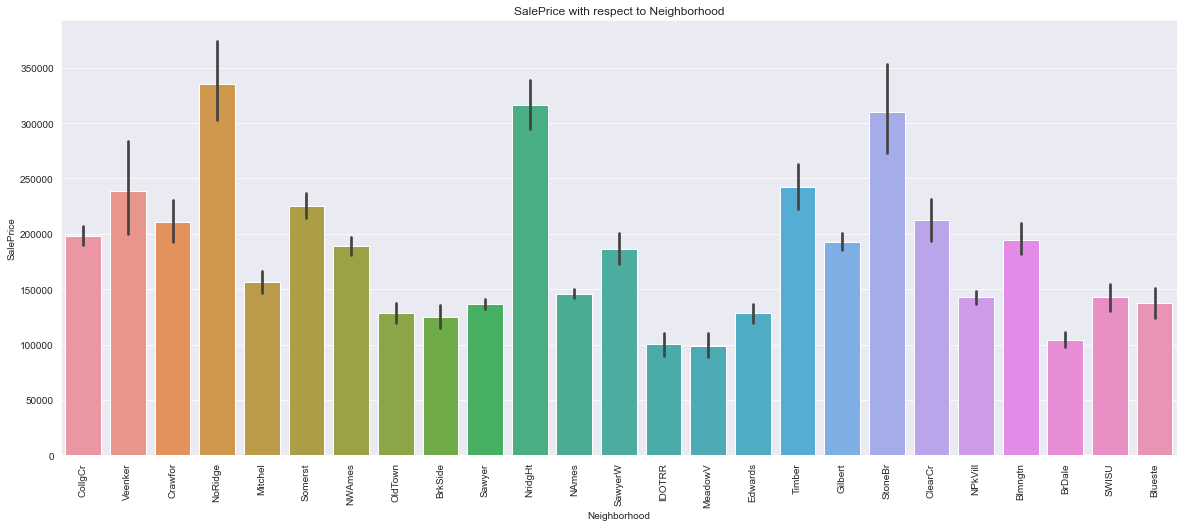

In [329]:
relativeplot('Neighborhood','SalePrice')

Prices are higher for NoRidge,NridgHt,StoneBr neighborhoods

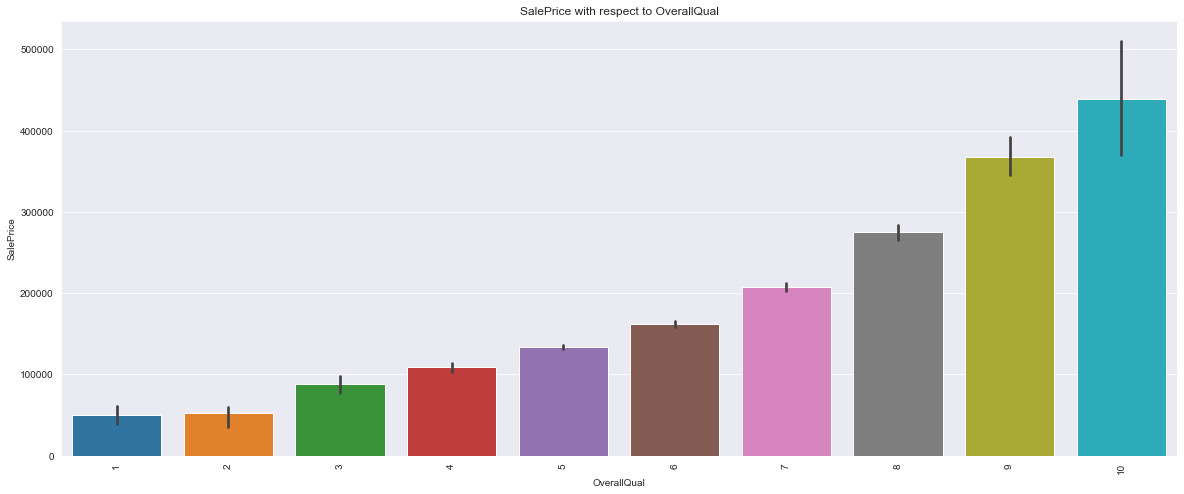

In [330]:

relativeplot('OverallQual','SalePrice')

SalePrice is directly proportional to Overall Quality

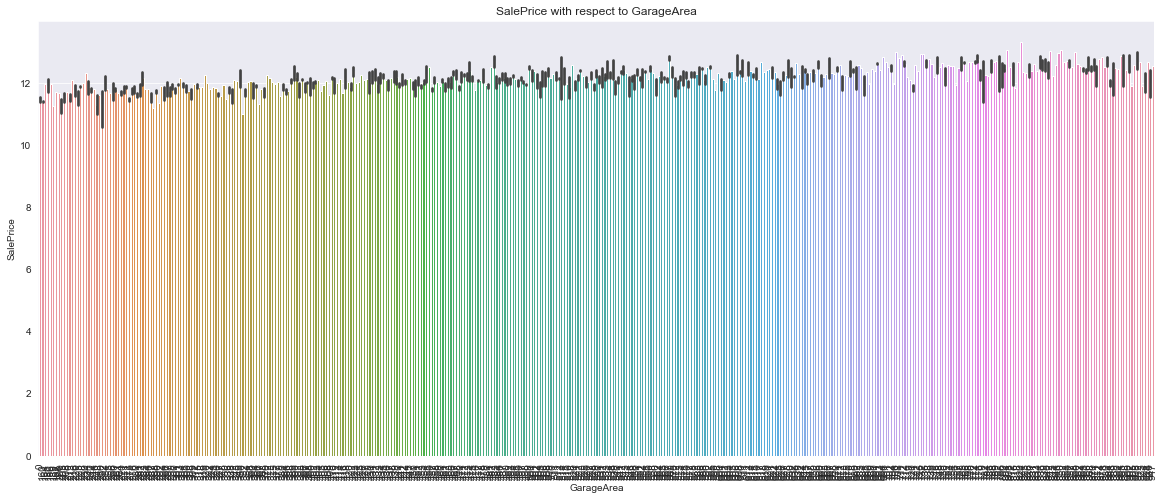

In [450]:

relativeplot('GarageArea','SalePrice')

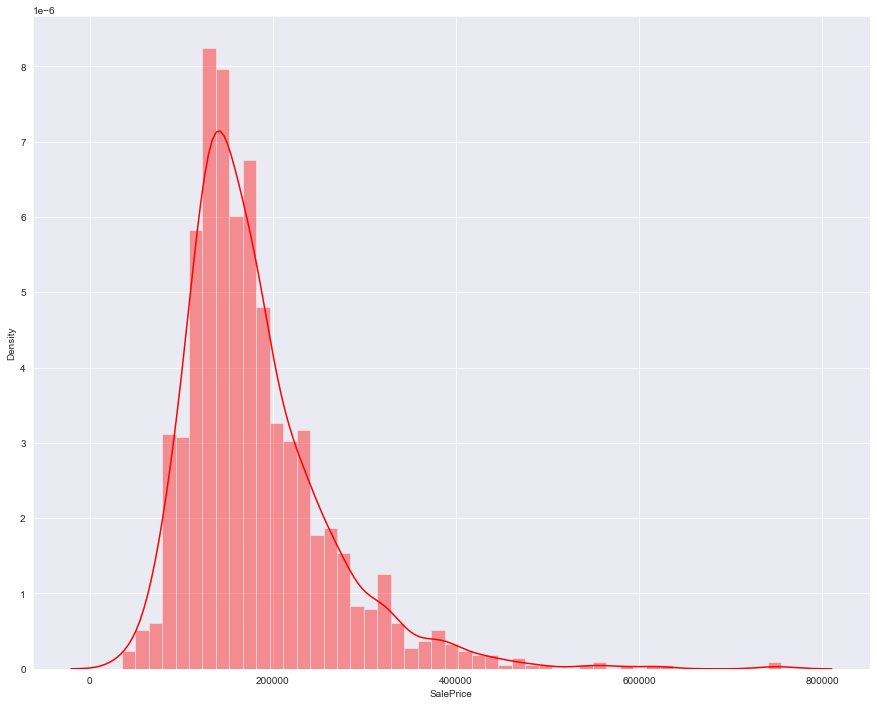

In [332]:
# Plotting the target variable 'SalePrice'
plt.figure(figsize=[15,12])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'],color='red');

SalePrice seems skewed towards left, let us check the skew value

In [333]:
df['SalePrice'].skew()

1.8828757597682129

Since skewness is greater than 1, let us apply log transform on target variable

In [334]:
df['SalePrice'] = np.log(df['SalePrice'])

In [335]:
df['SalePrice'].skew()

0.12133506220520406

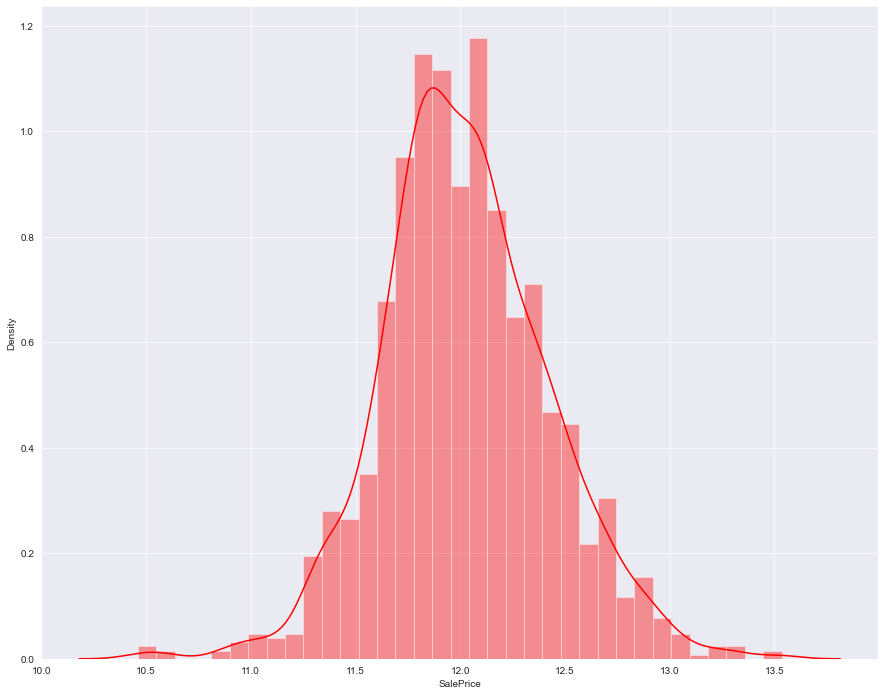

In [336]:
plt.figure(figsize=[15,12])
sns.set_style('darkgrid')
sns.distplot(df['SalePrice'],color='red');

Now the skewness is resolved

In [337]:
def singleplot(x):
    
    plt.figure(figsize=(15,5))
    
    plt.subplot(1,2,2)
    plt.title(x)
    sns.distplot(df[x],color='blue')
    
    plt.subplot(1,2,1)
    sns.boxplot(df[x], color='green')
    plt.show()   

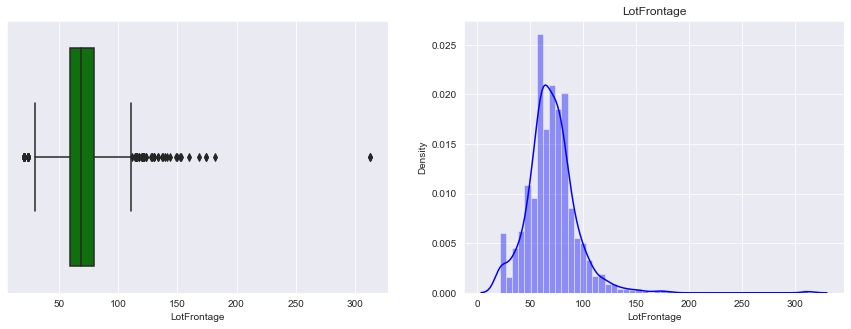

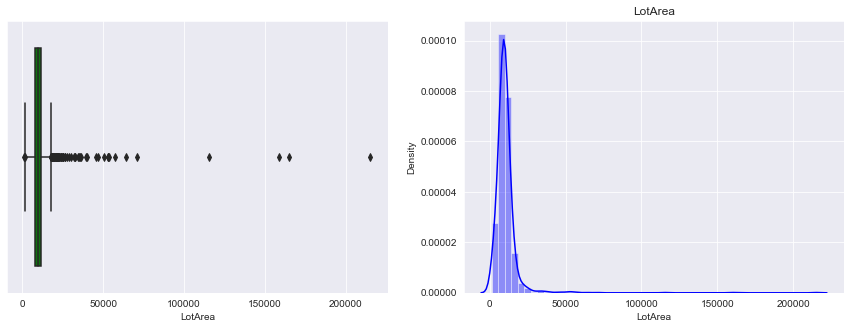

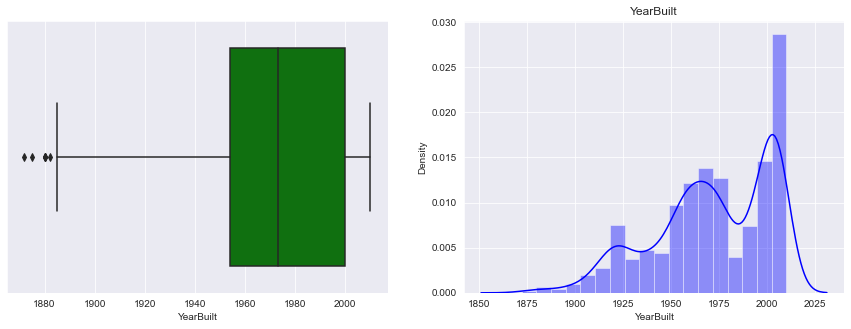

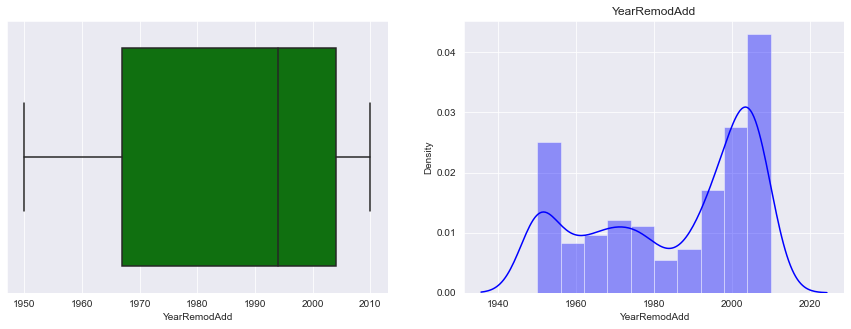

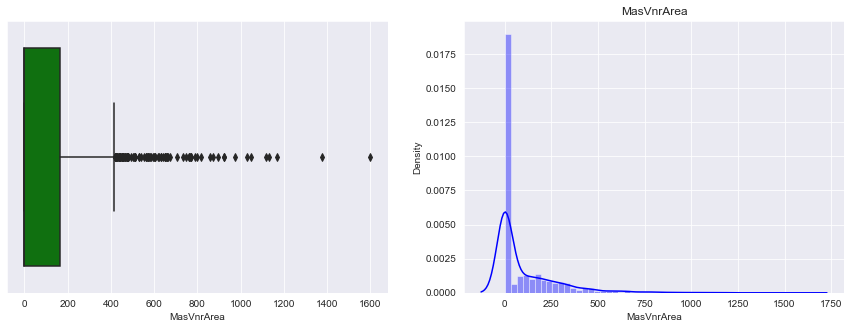

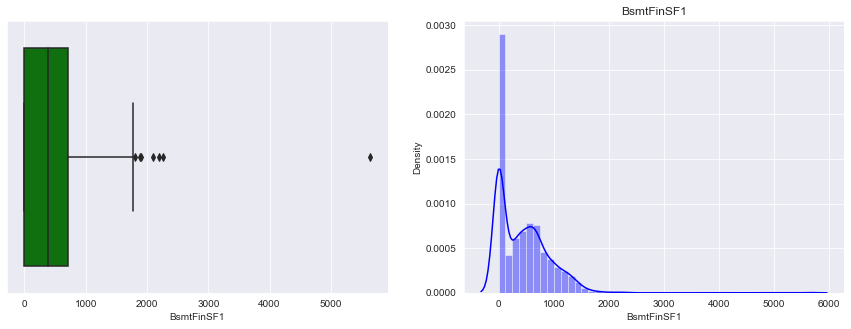

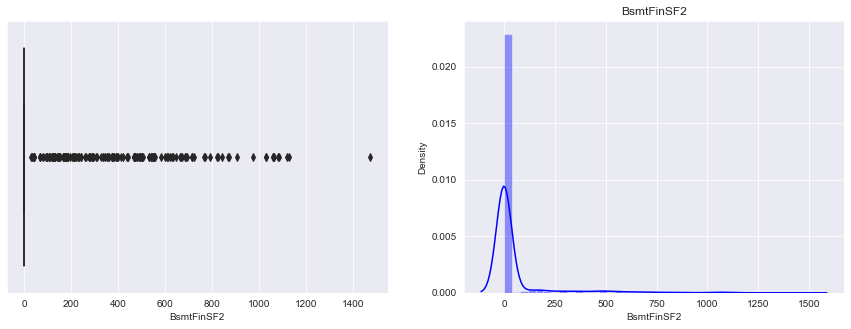

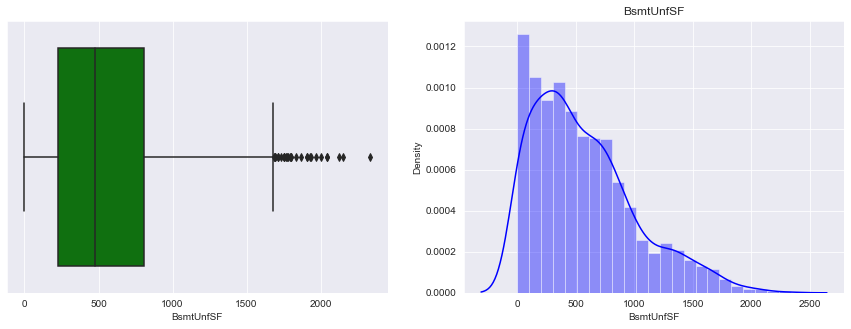

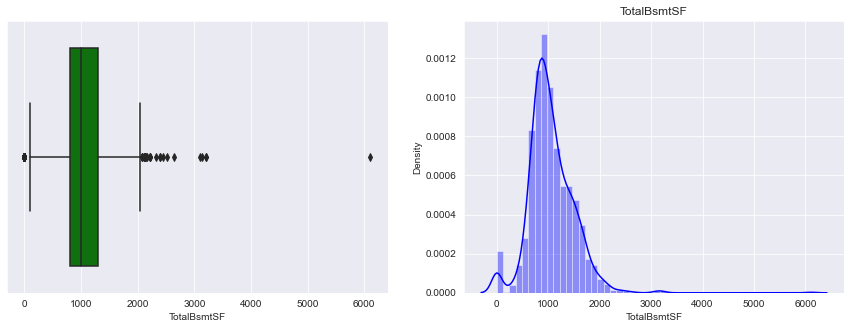

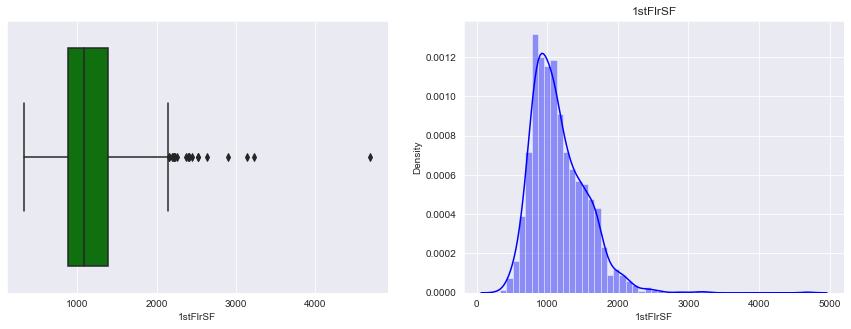

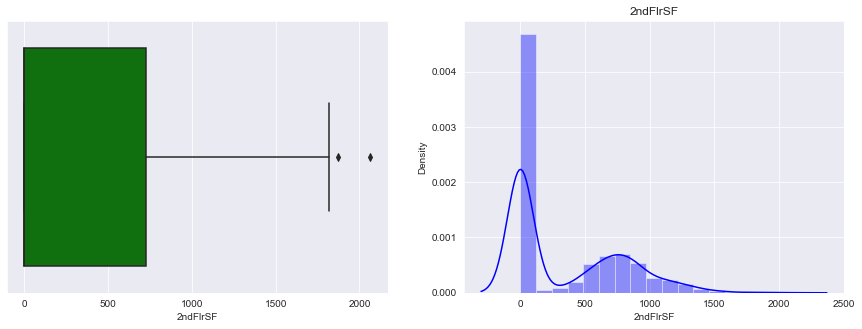

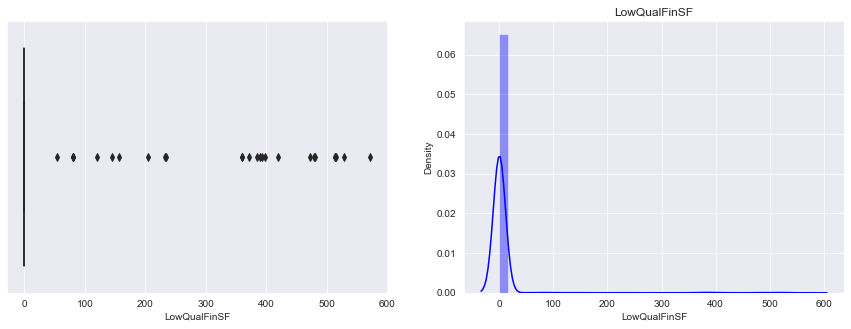

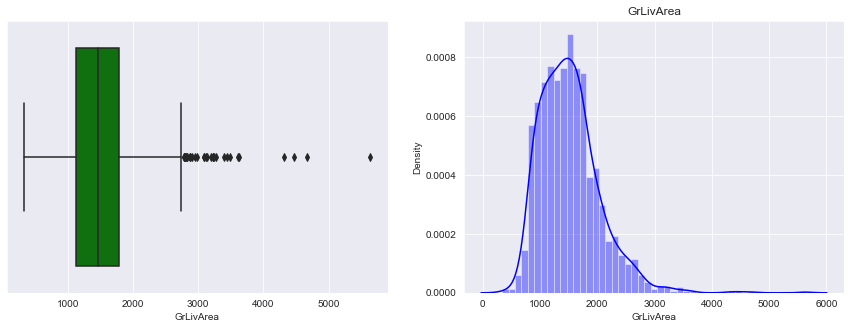

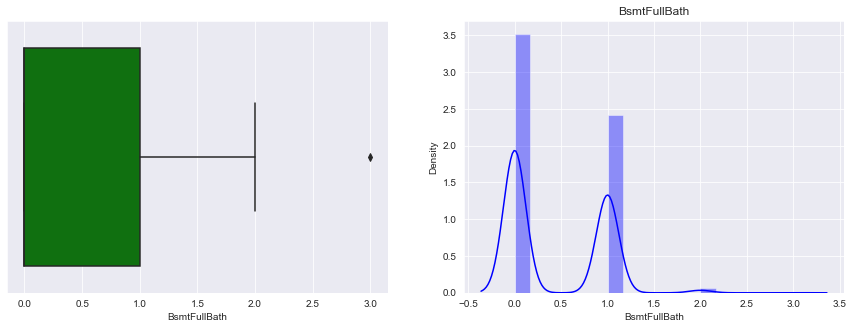

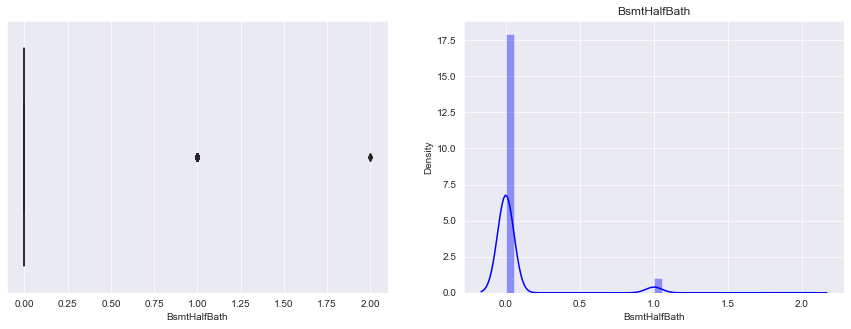

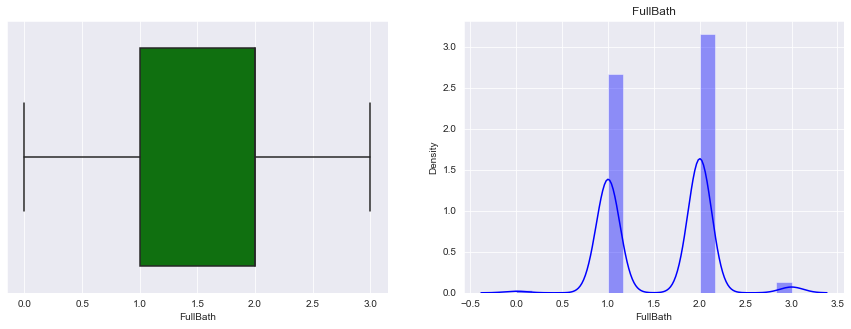

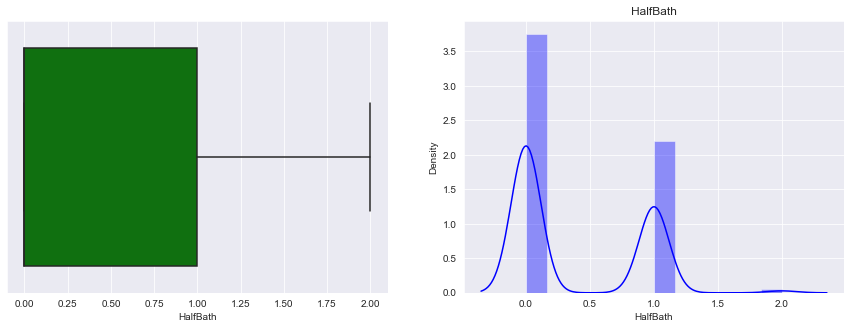

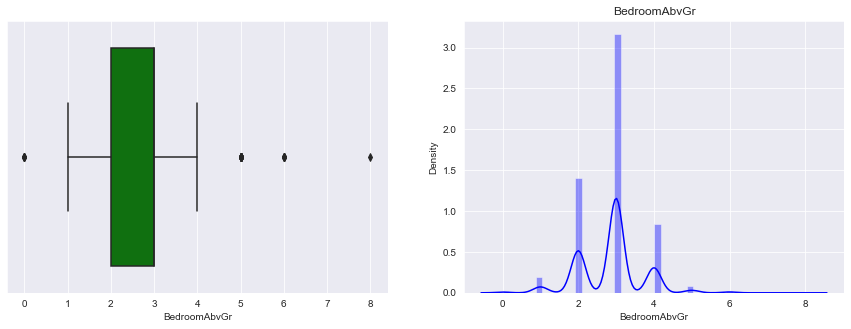

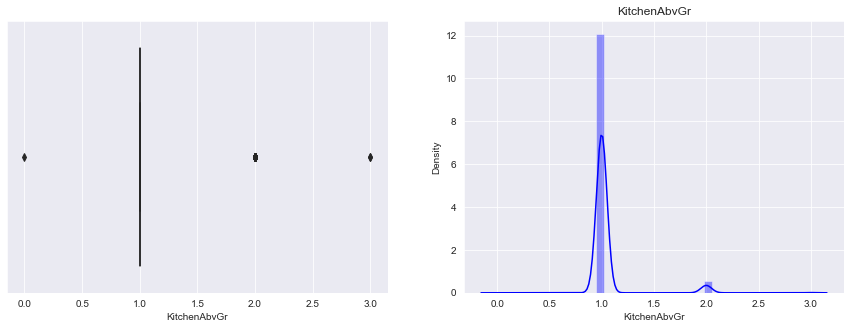

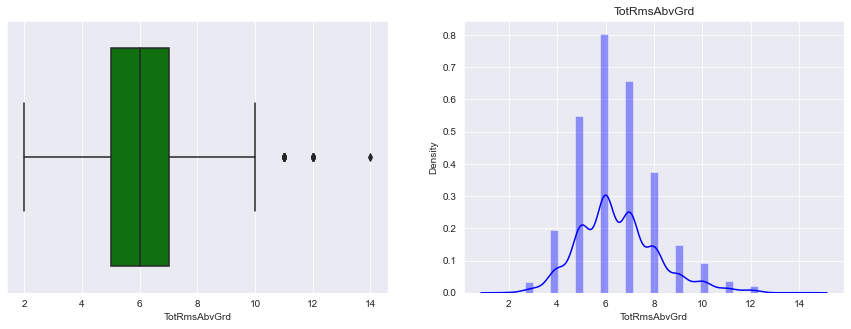

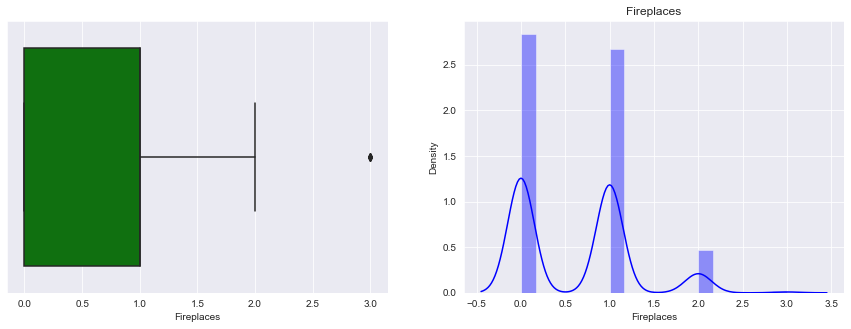

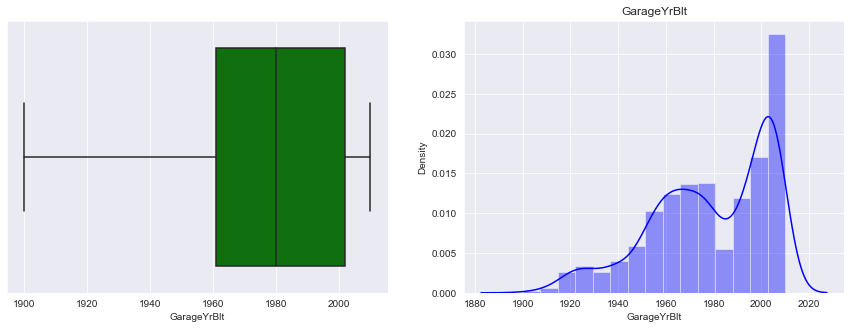

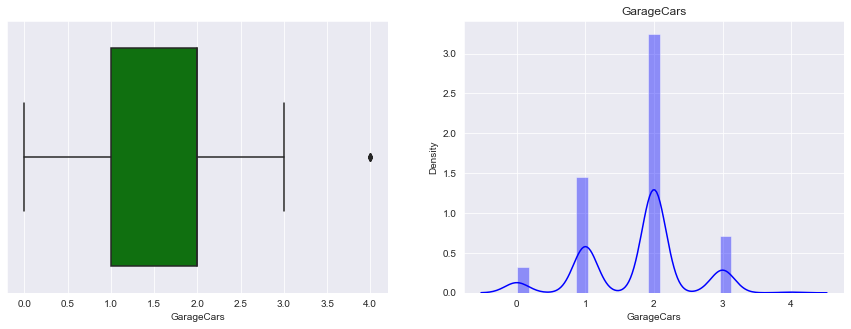

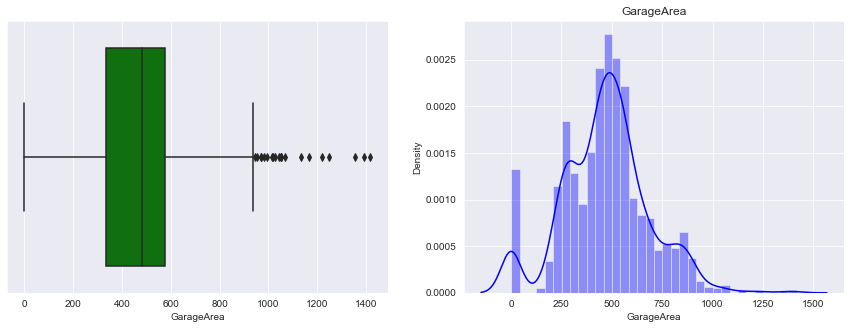

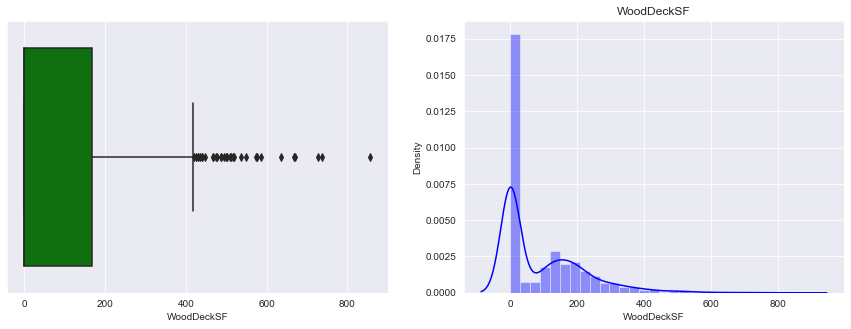

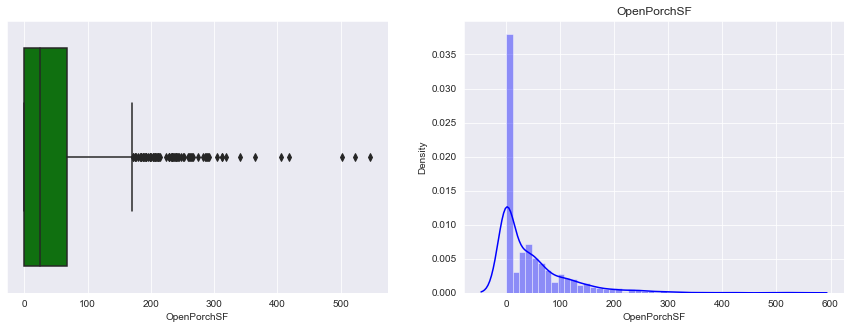

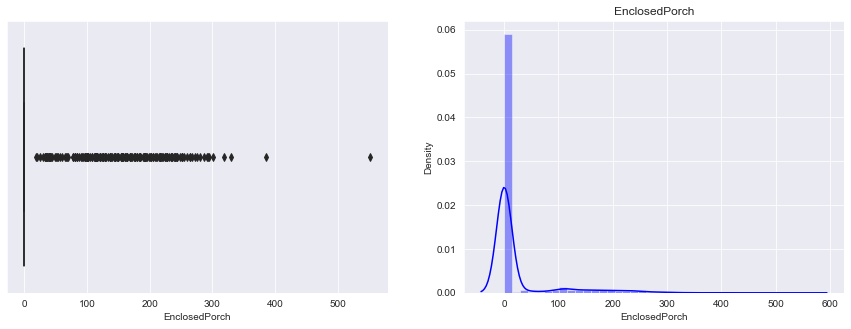

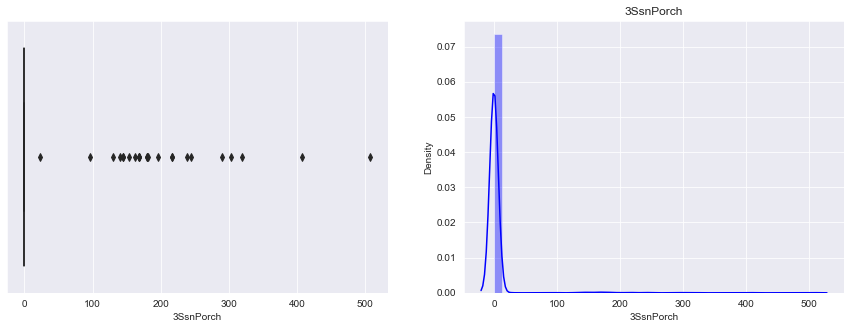

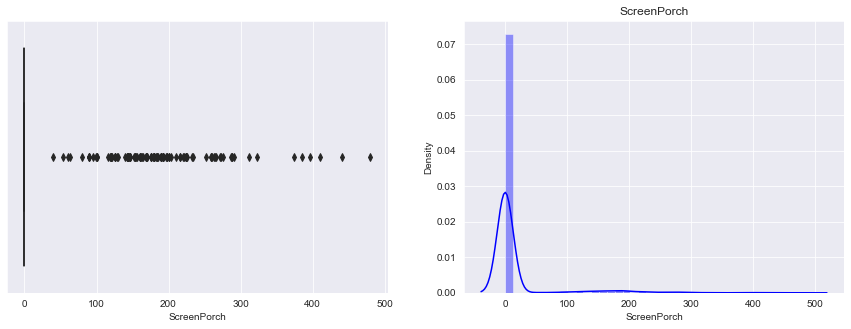

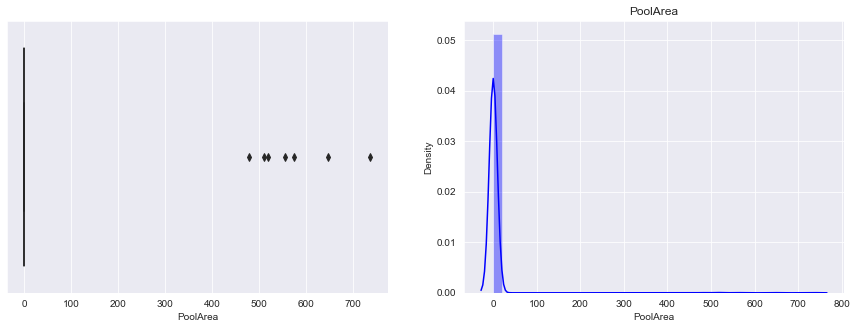

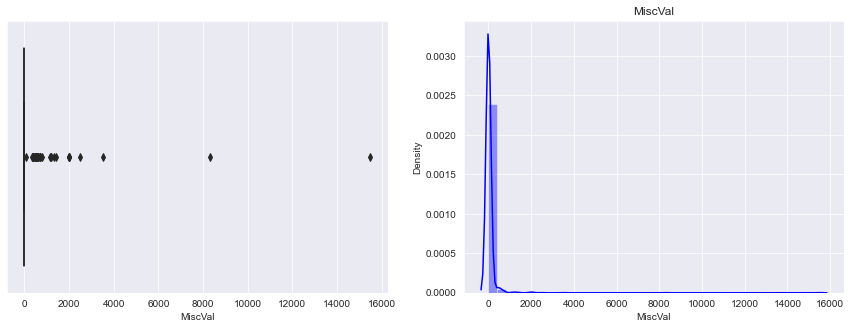

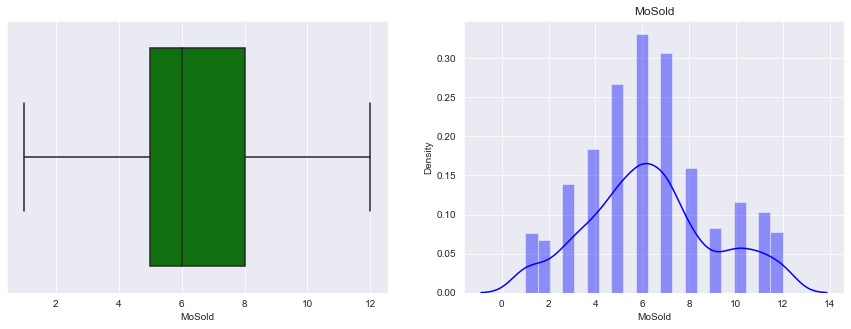

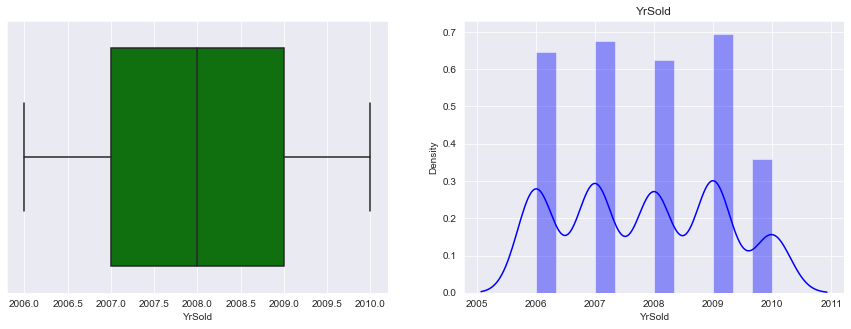

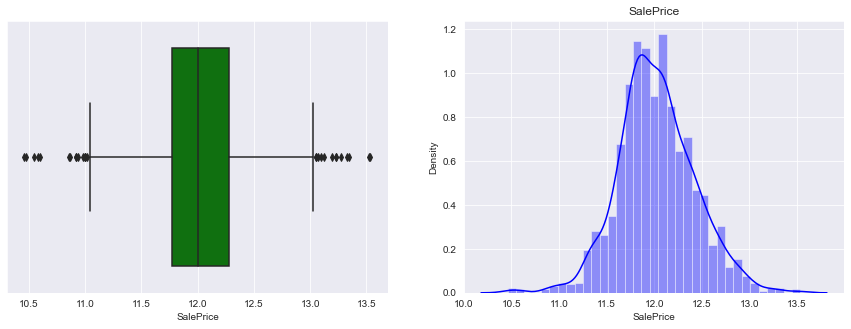

In [338]:
for i in df_numeric.columns:
    singleplot(i)

Many columns have outliers

### Categorical columns

In [339]:
df_cat = df.select_dtypes(include=['object'])
df_cat

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,none,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1,20,RL,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
2,60,RL,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
3,70,RL,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,none,none,none,WD,Abnorml
4,60,RL,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,none,none,none,WD,Normal
1456,20,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,none,MnPrv,none,WD,Normal
1457,70,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,none,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,none,Attchd,Unf,TA,TA,Y,none,none,none,WD,Normal


In [340]:
def cat_barplot(x):
    
    plt.figure(figsize=(12,10))
    plt.title(x)
    sns.barplot(df[x].value_counts().index, df[x].value_counts())
    plt.show()

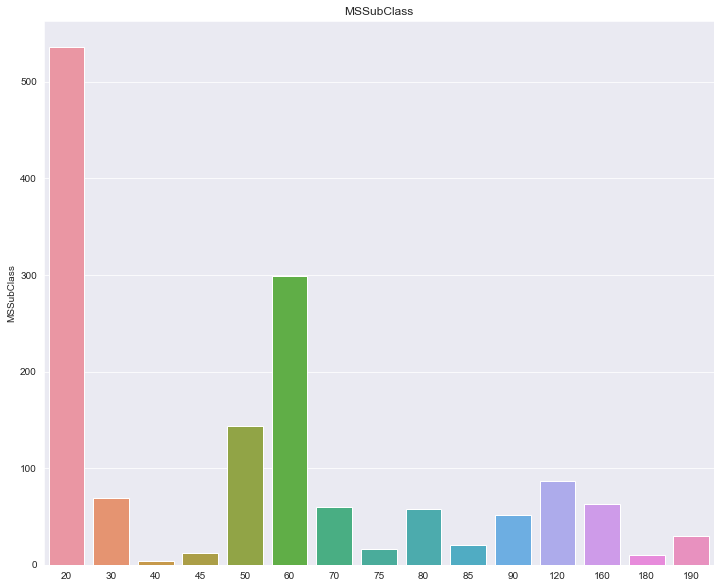

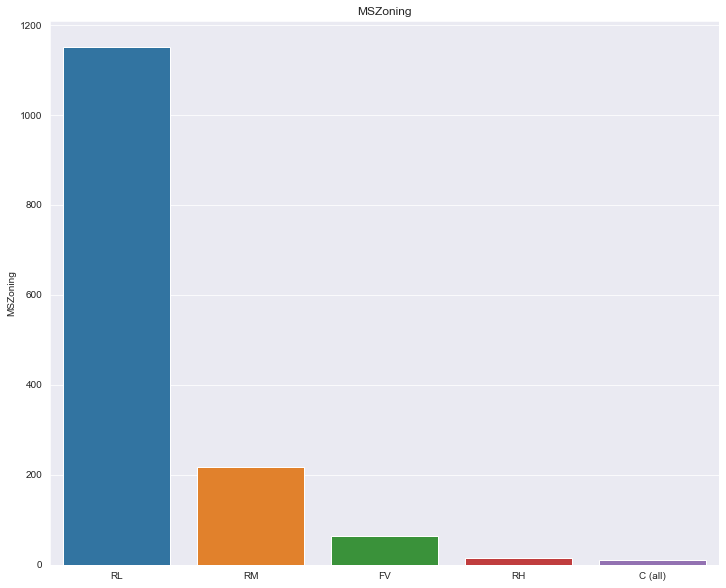

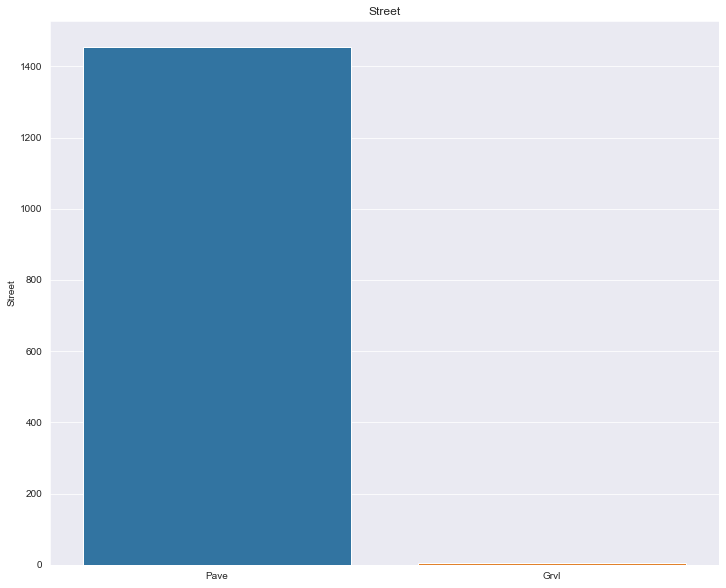

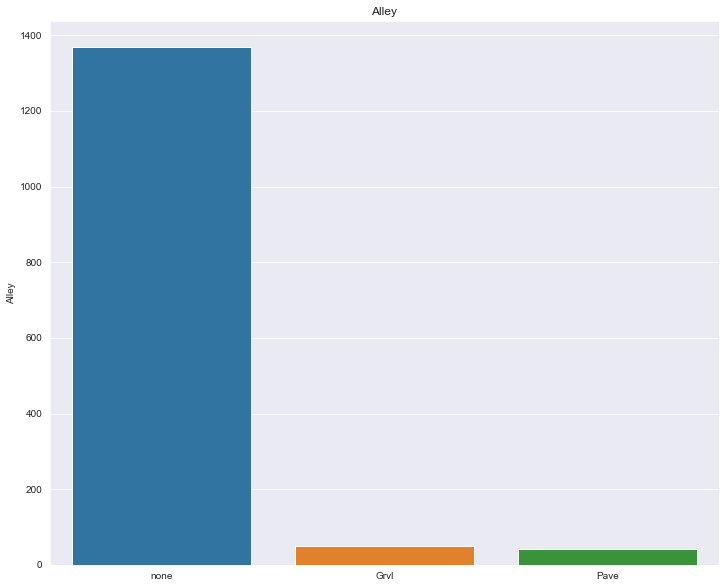

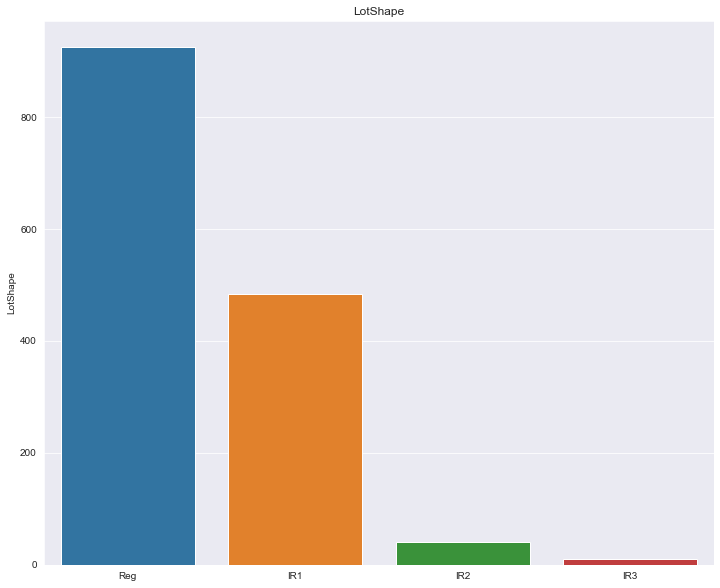

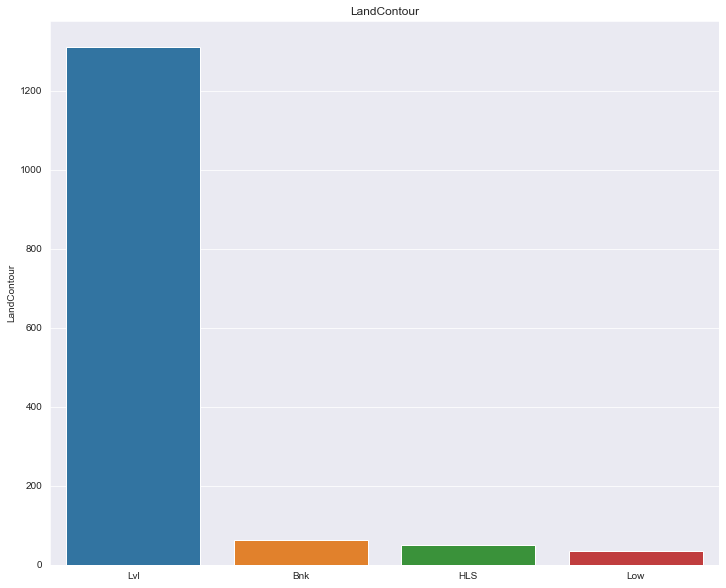

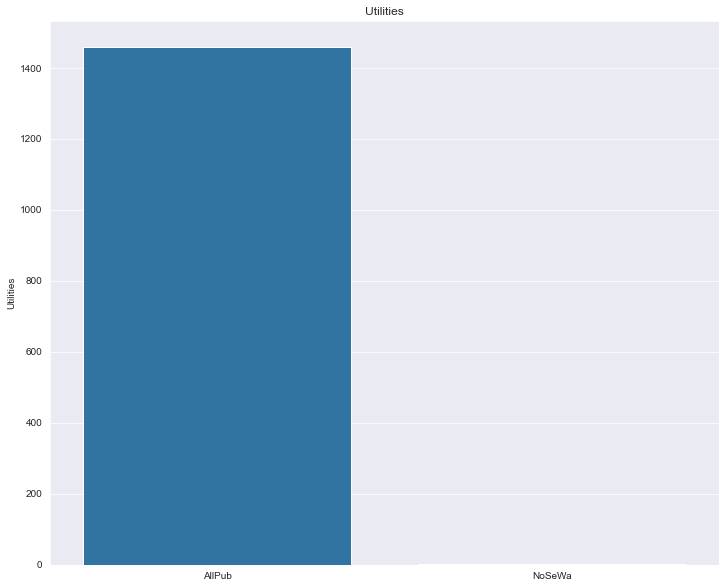

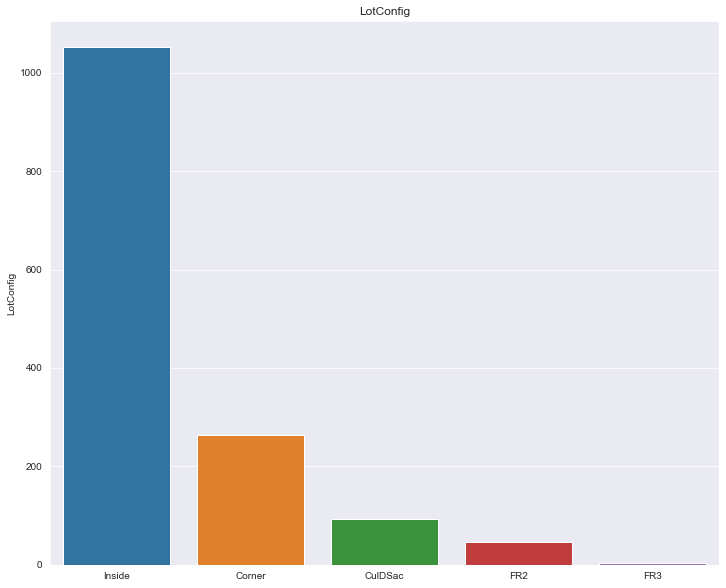

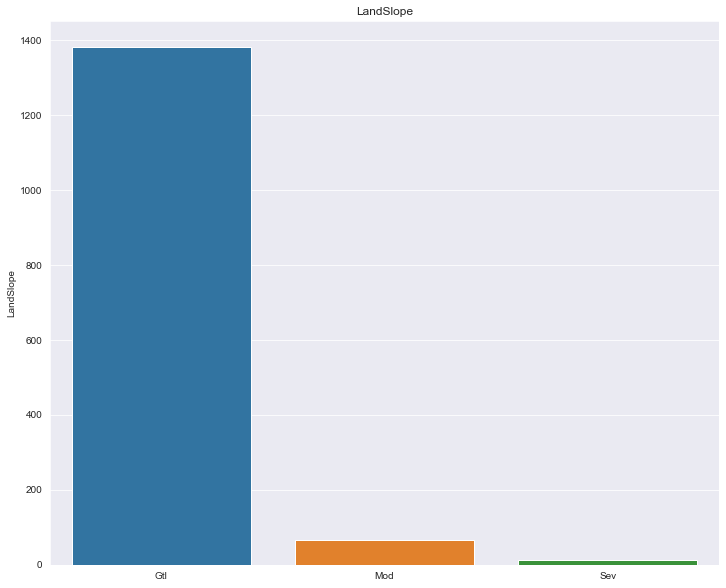

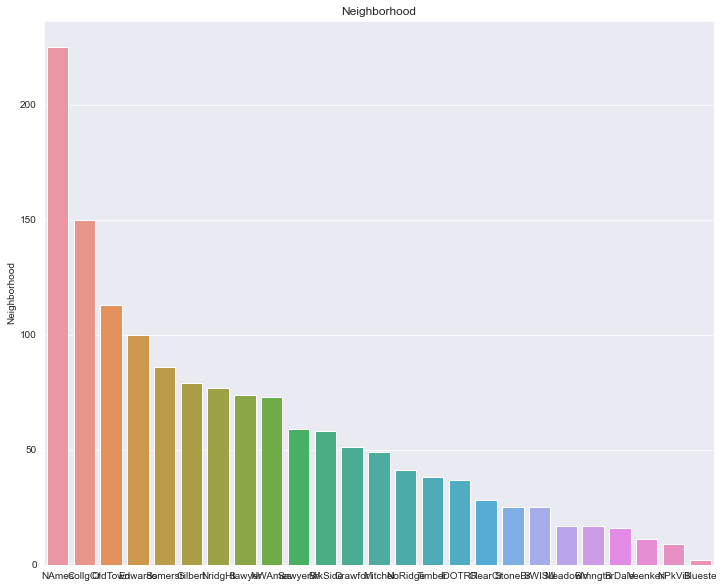

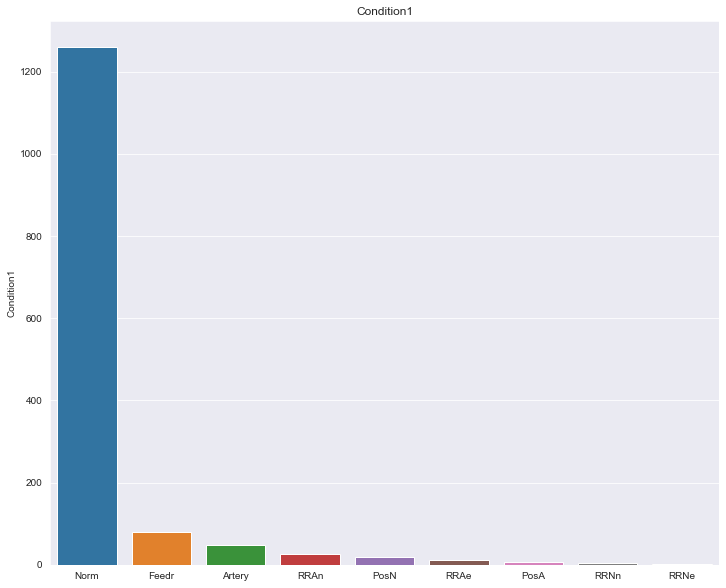

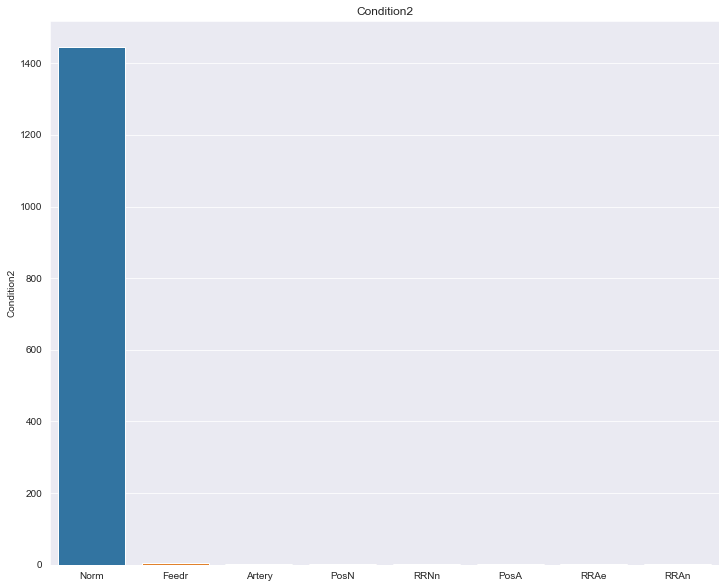

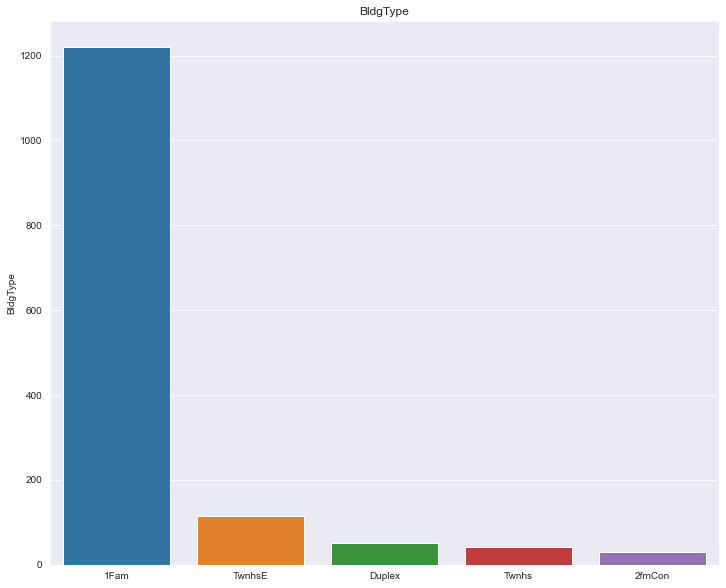

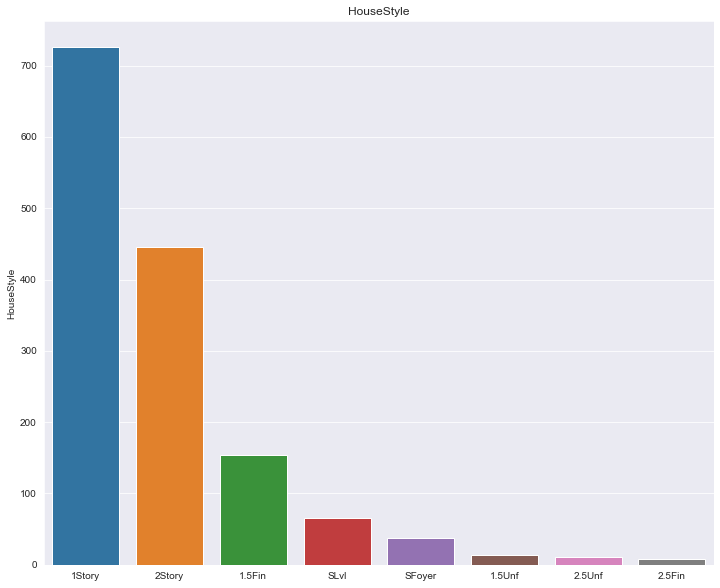

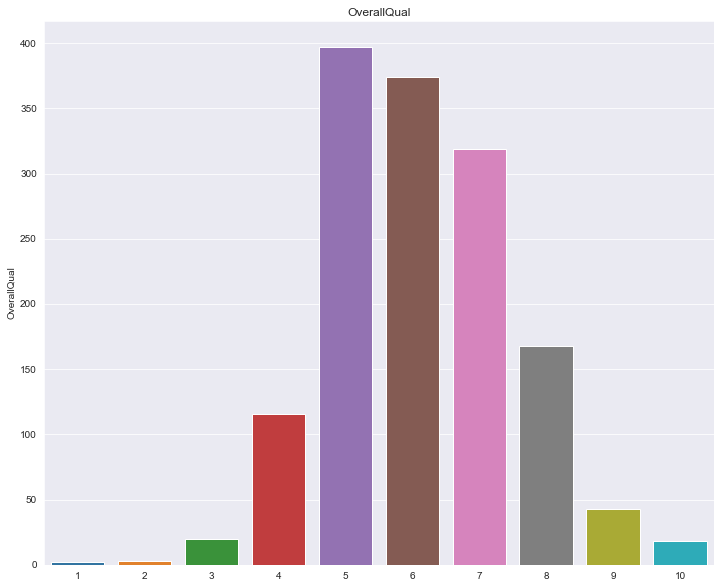

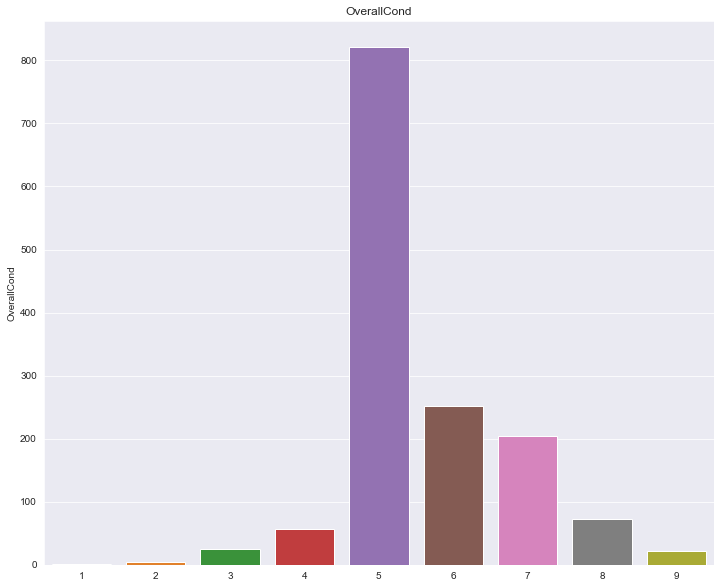

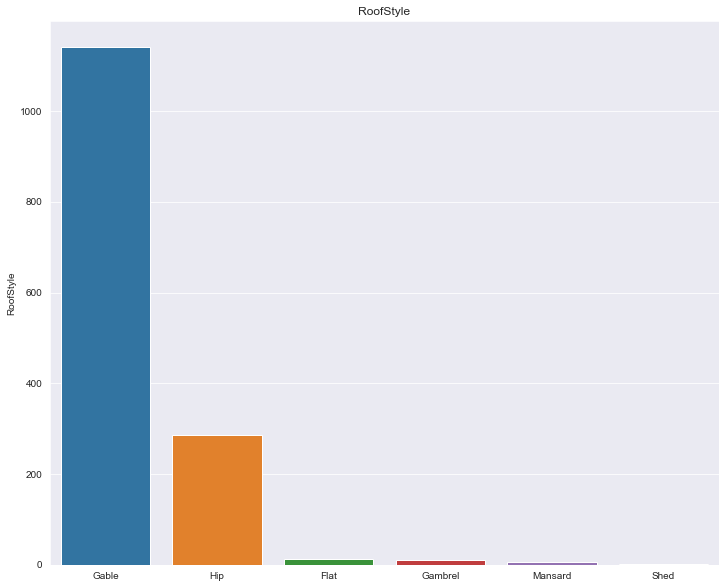

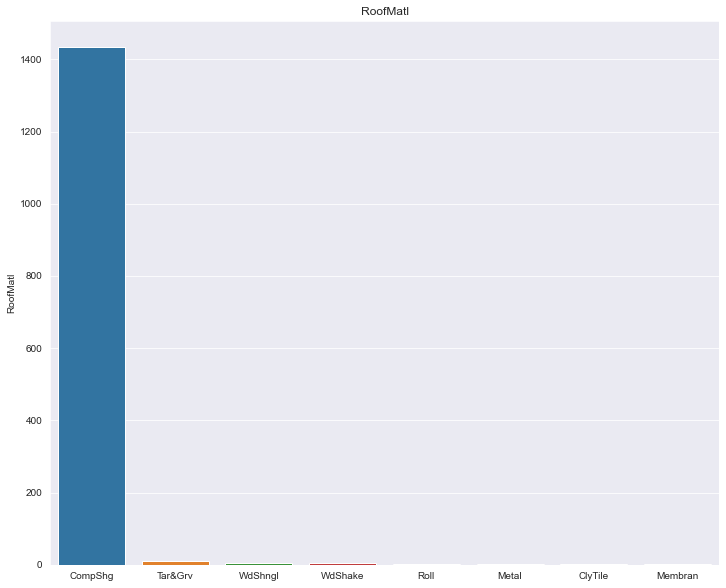

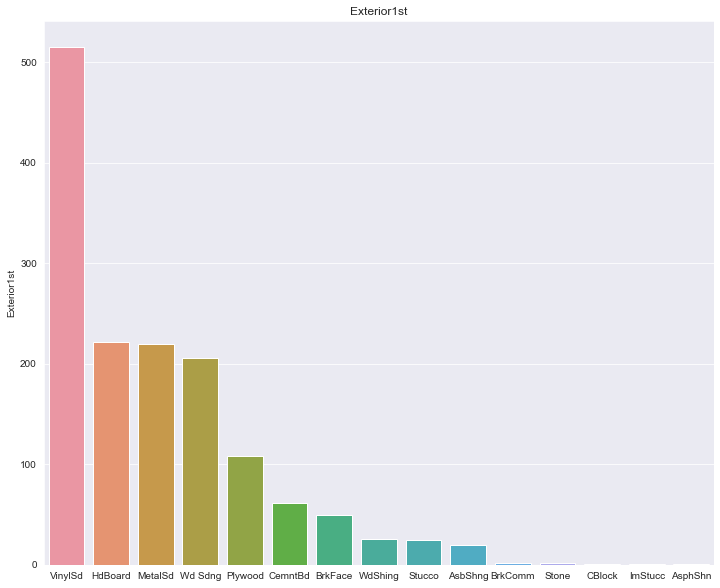

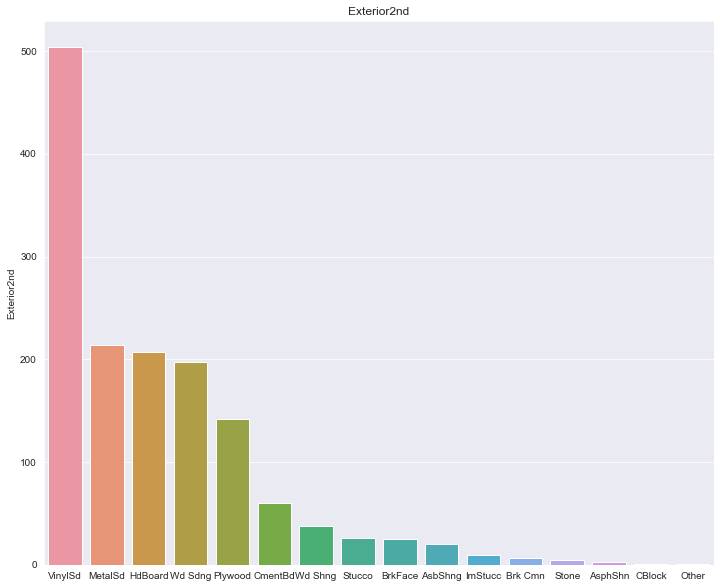

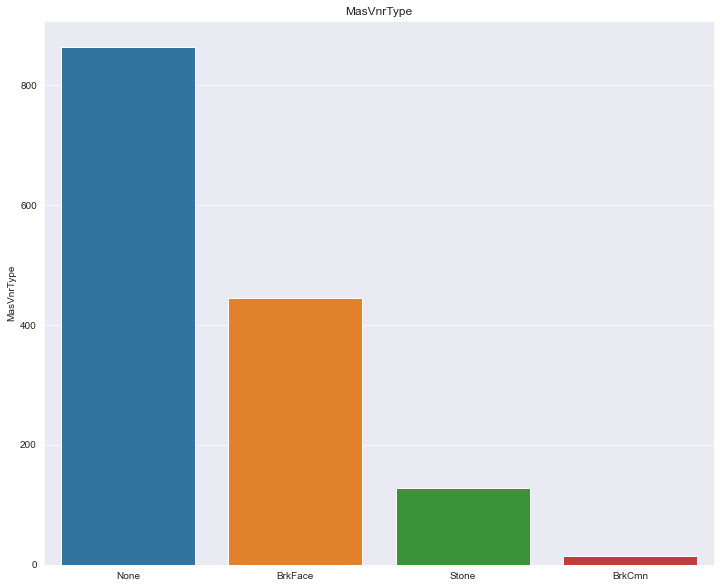

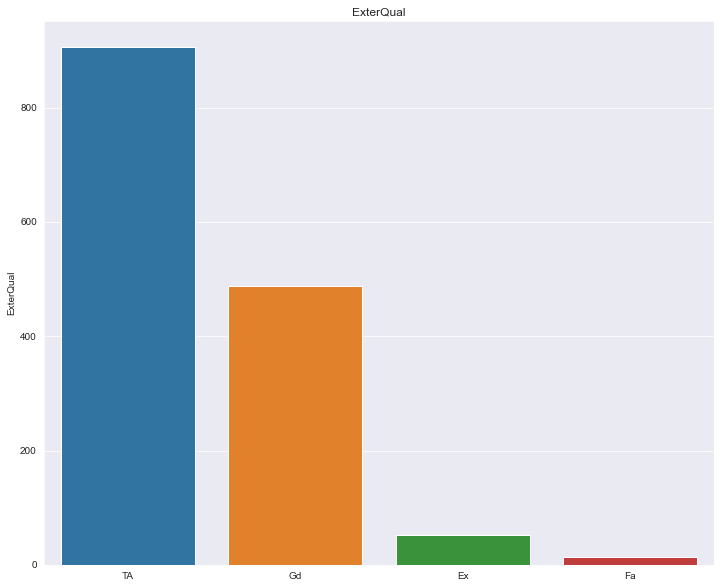

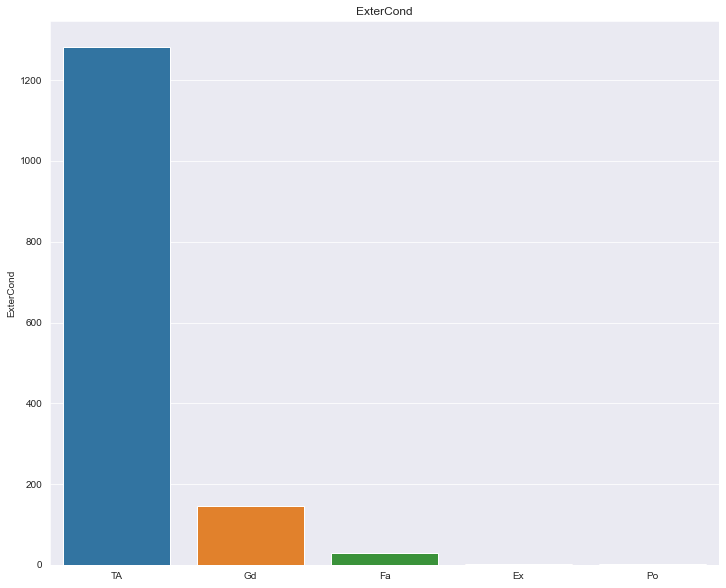

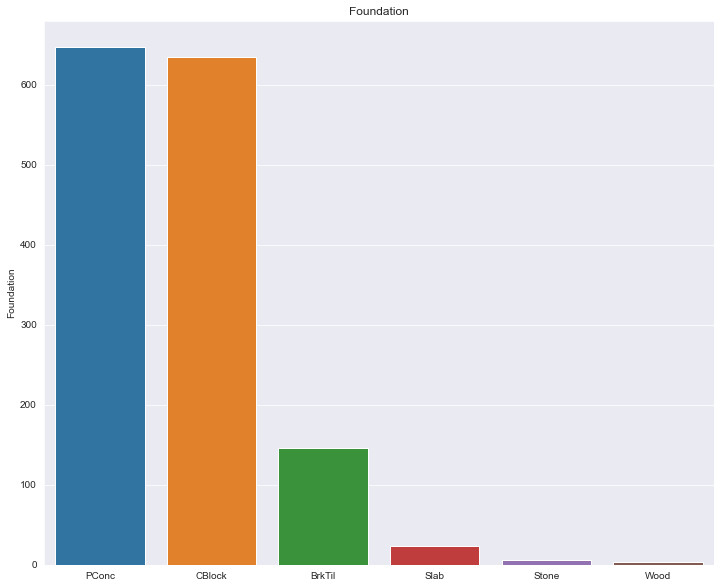

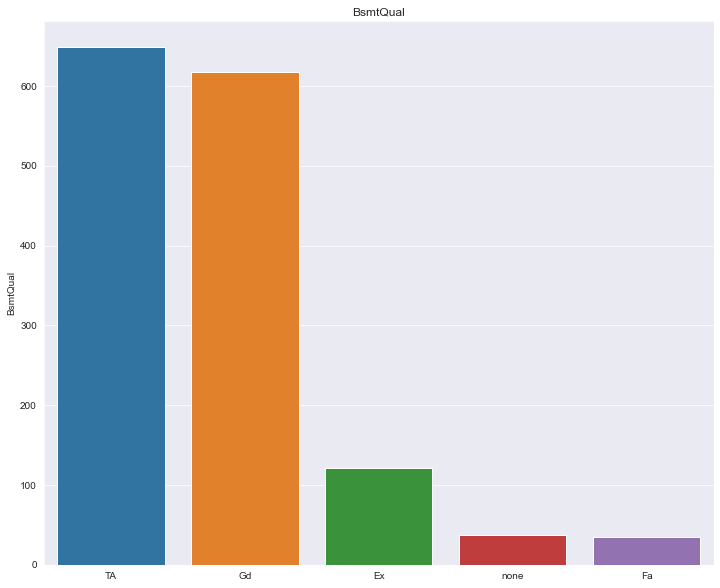

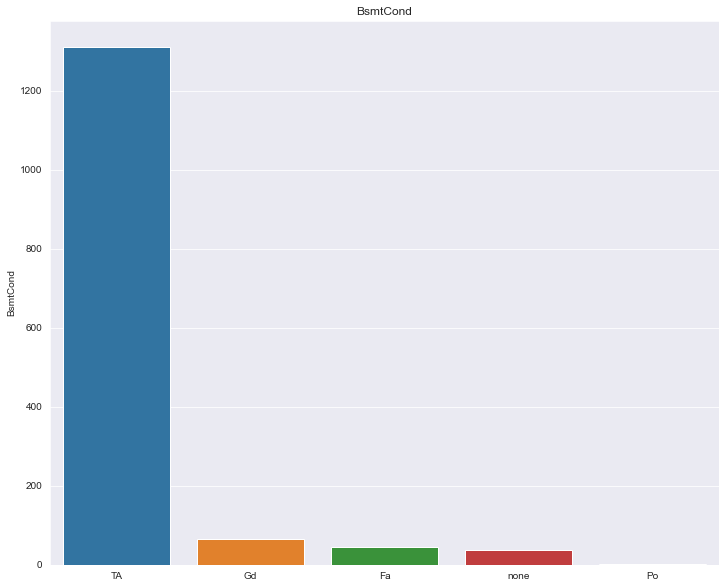

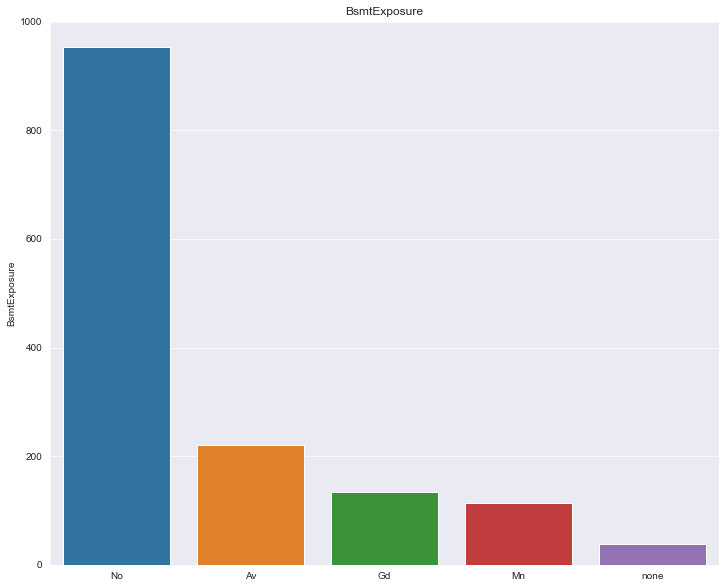

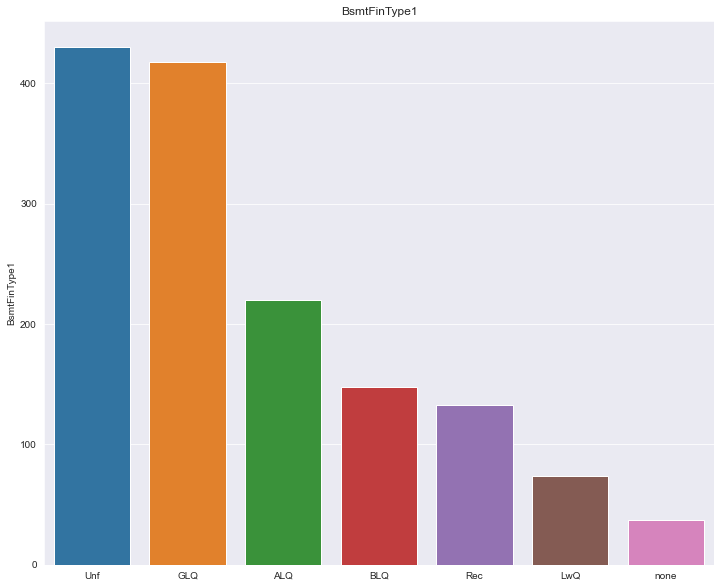

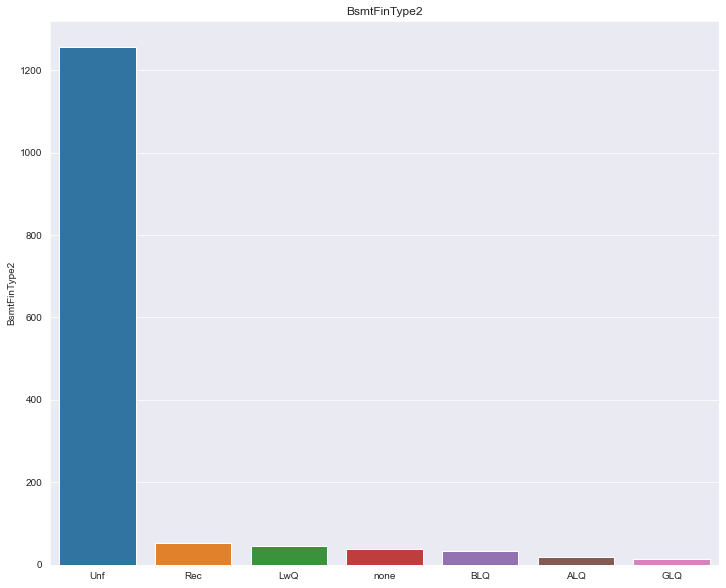

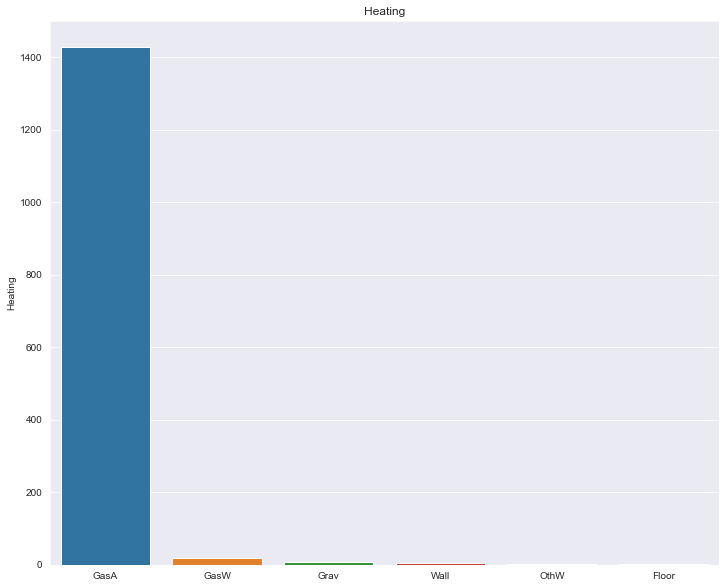

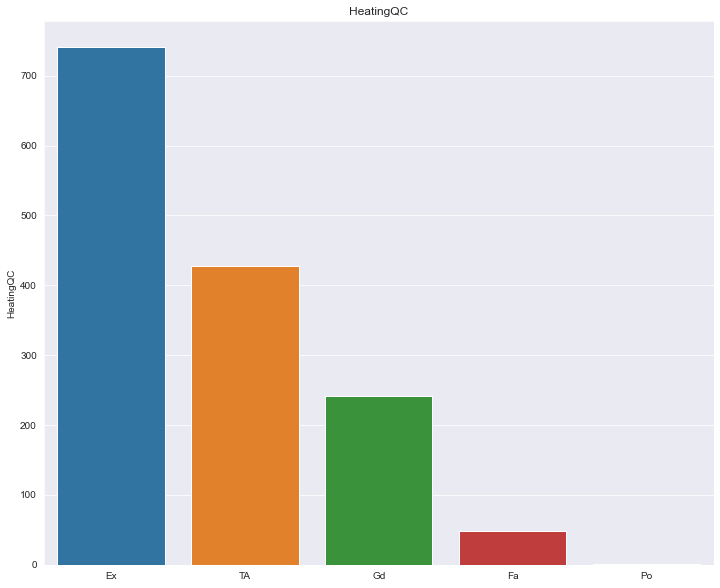

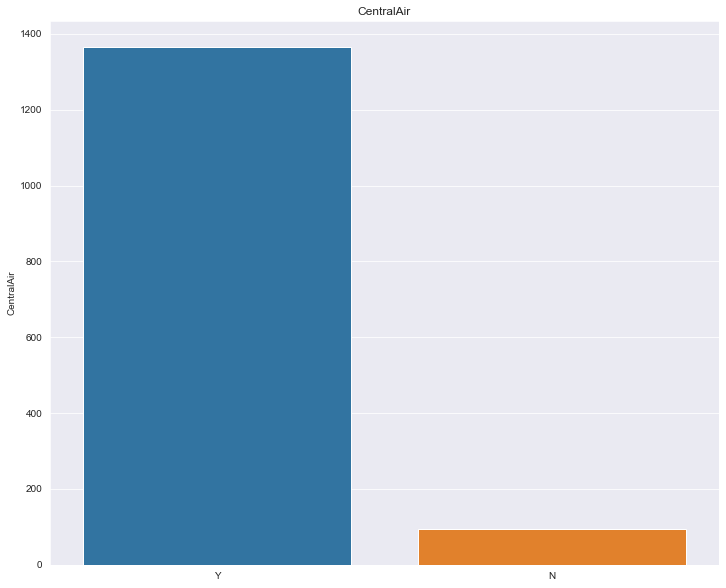

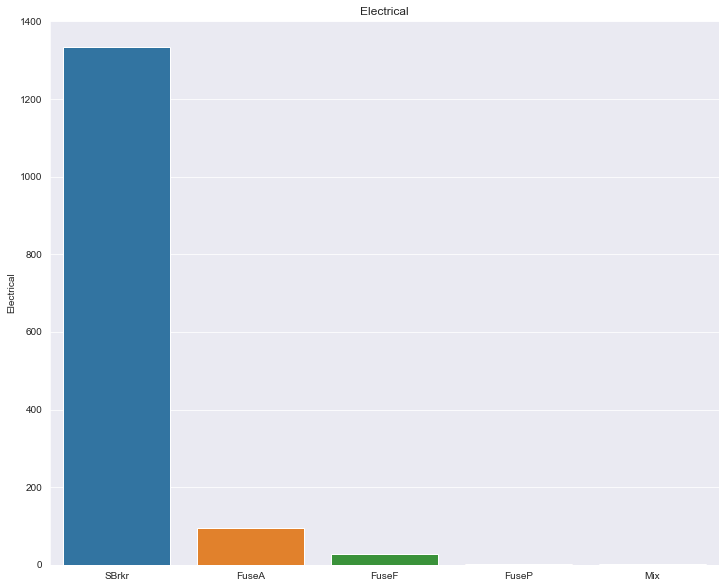

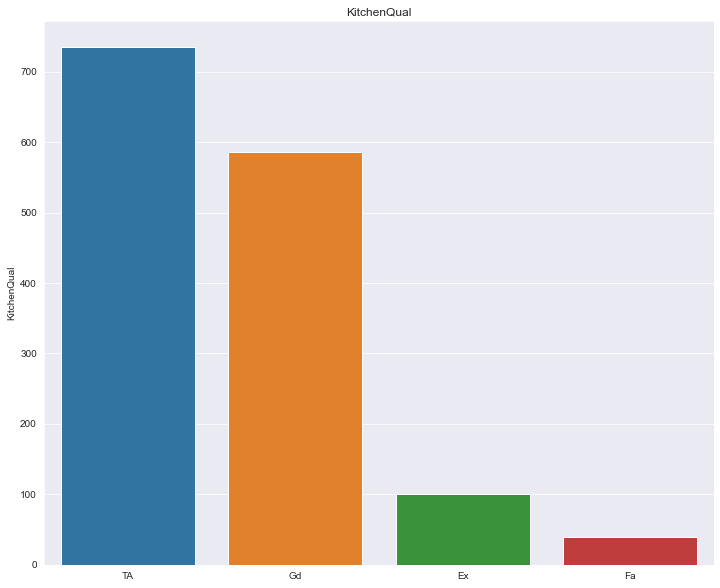

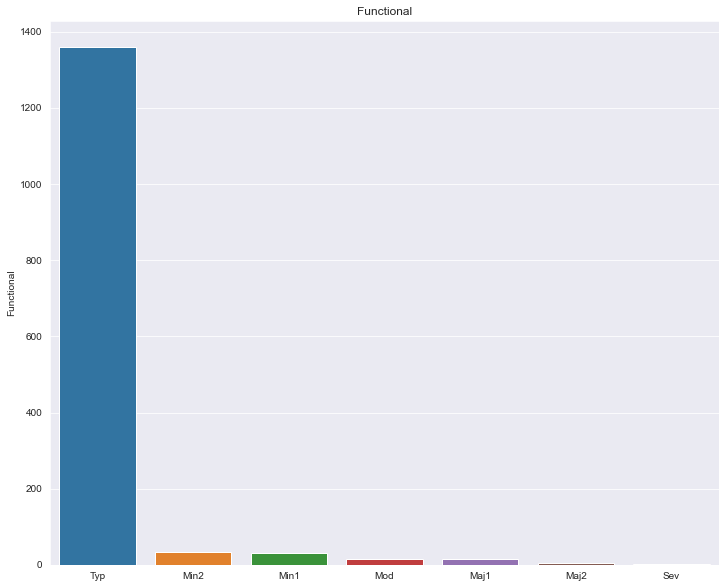

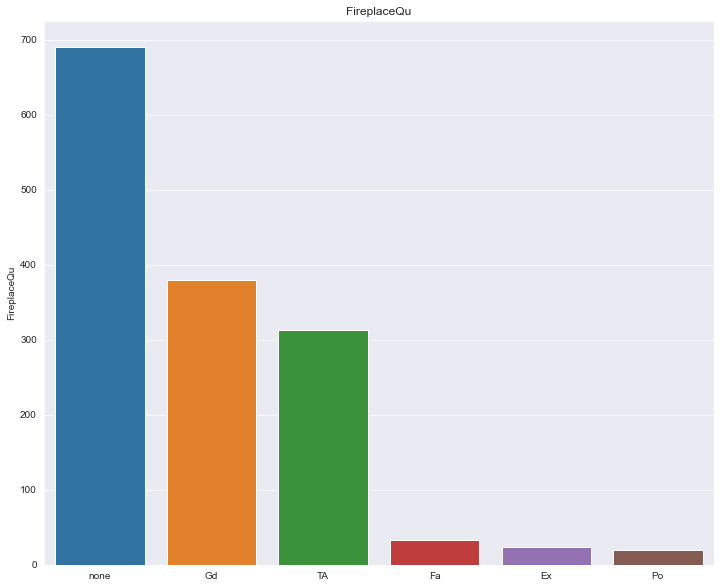

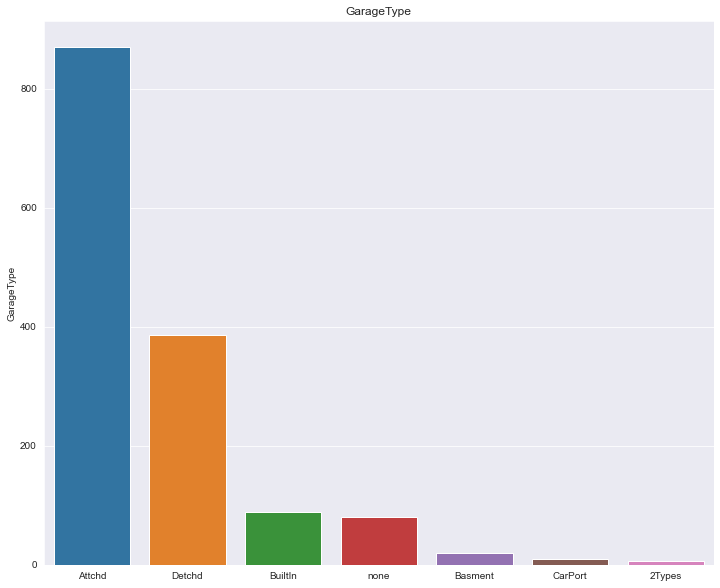

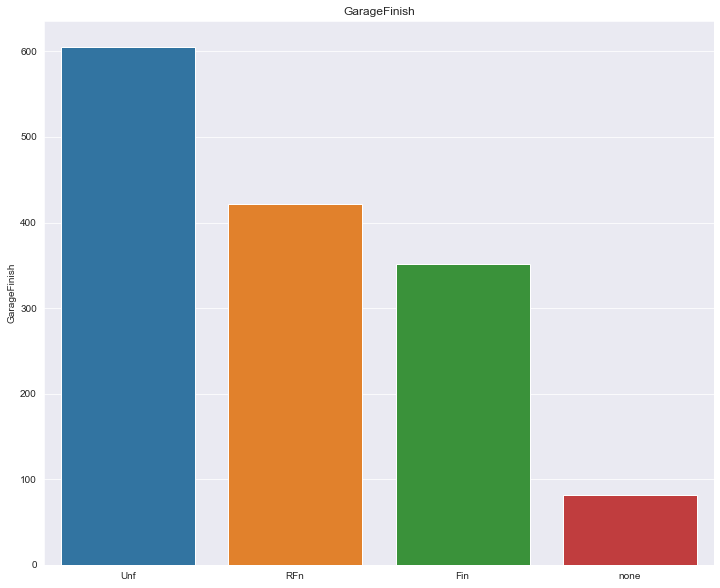

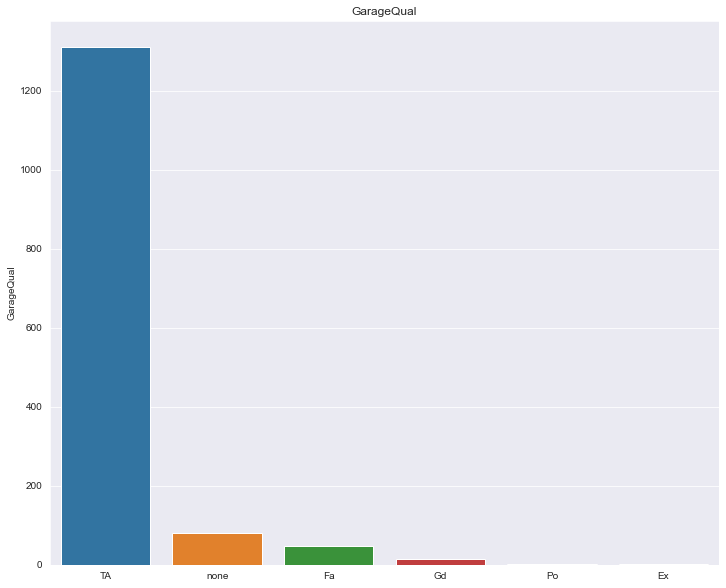

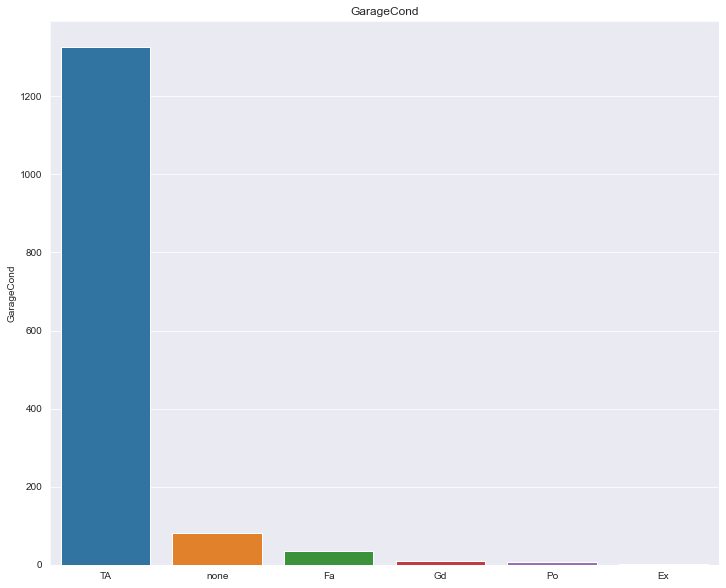

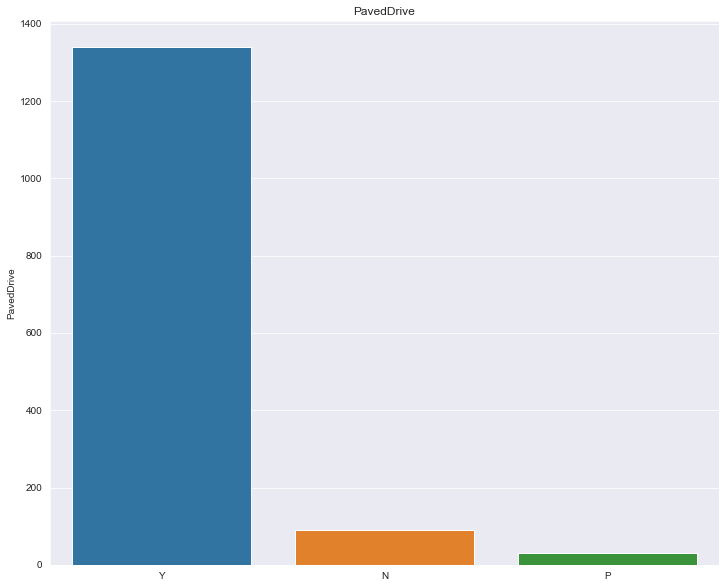

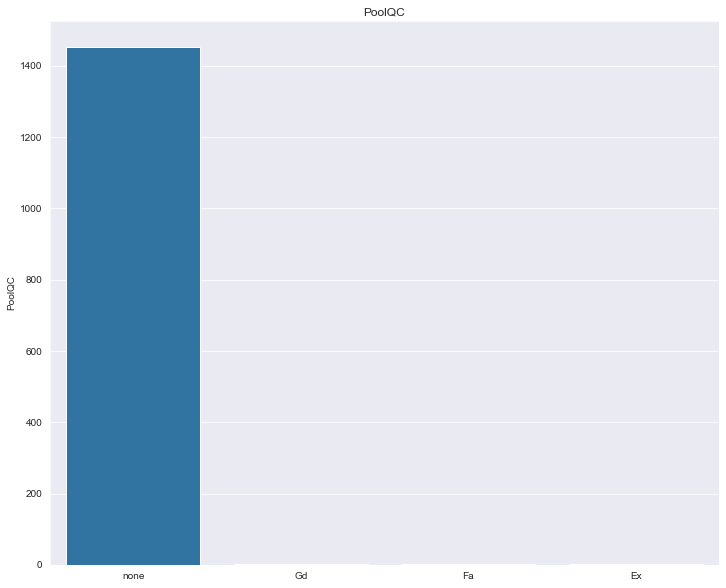

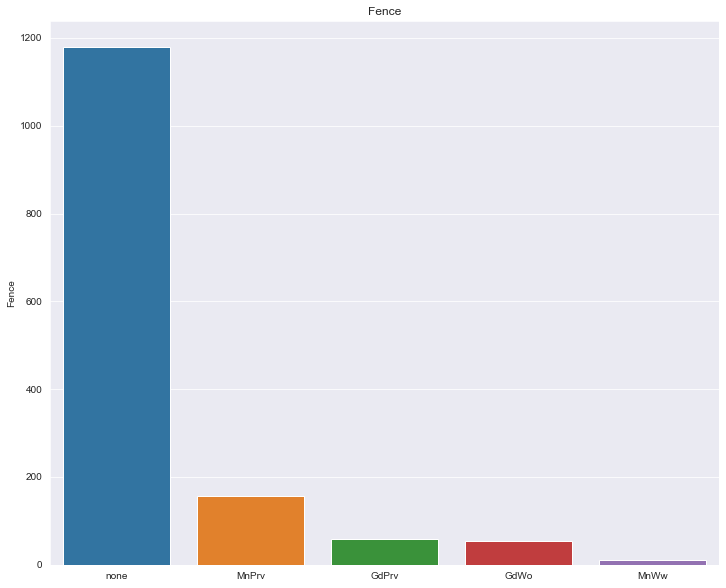

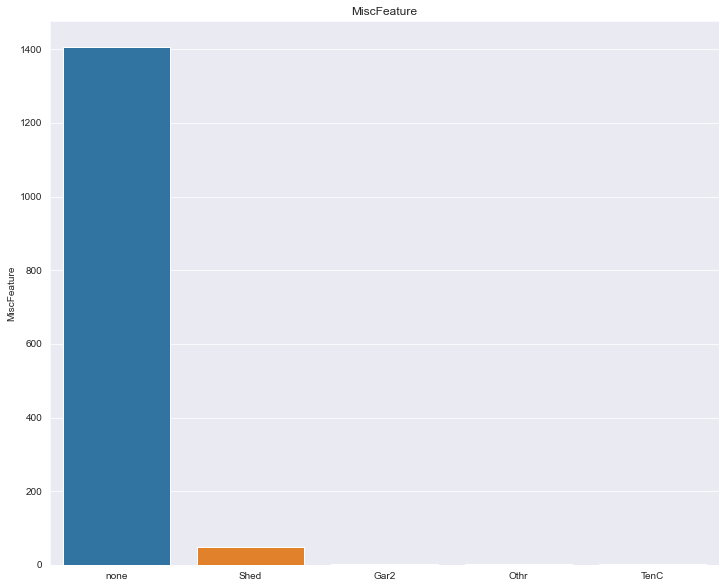

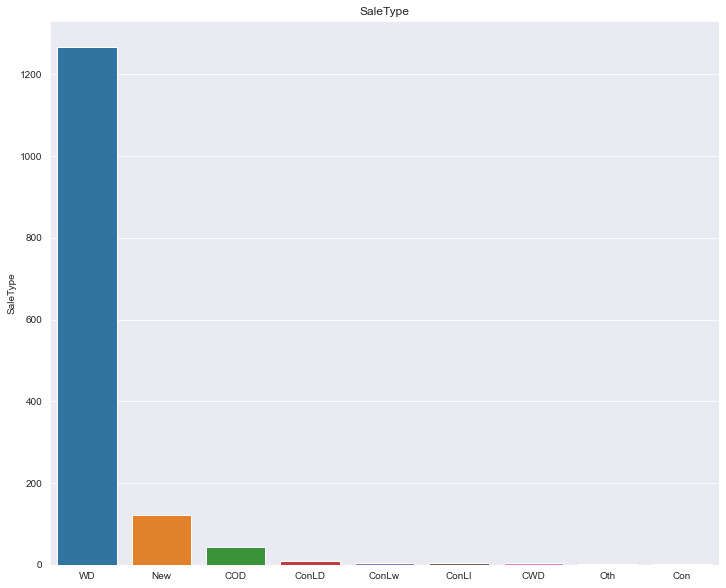

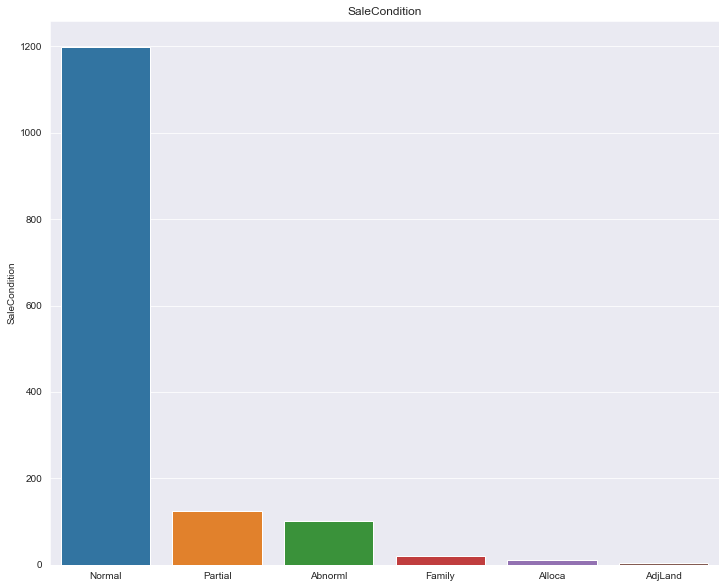

In [341]:
for col in df_cat.columns:
    cat_barplot(col)

#### Correlation anlaysis

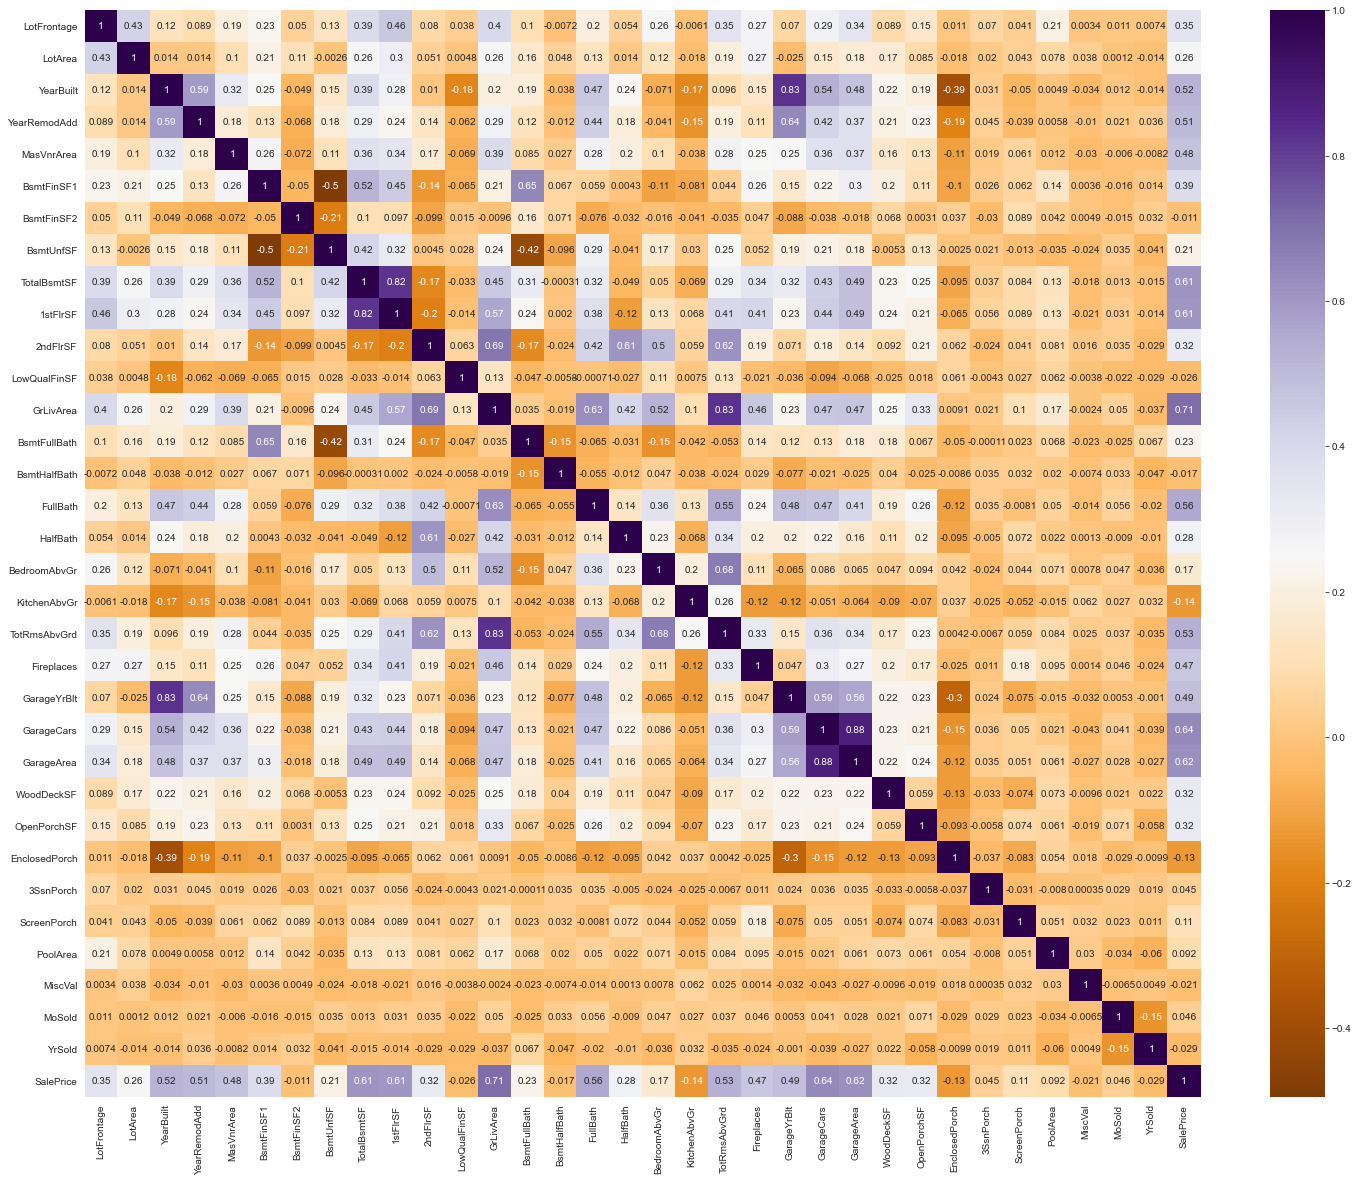

In [342]:
plt.figure(figsize=(25,20))
sns.heatmap(df_numeric.corr(), annot=True, cmap='PuOr');

From the heatmap we can observe that target variable SalePrice is highly correlated with GrLivArea, GarageCars and GarageArea

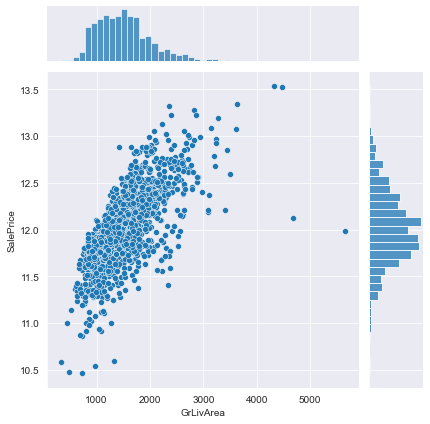

In [343]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

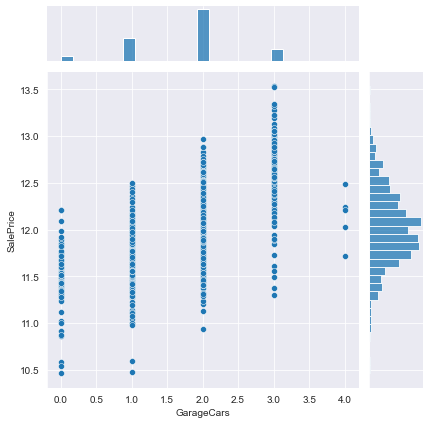

In [344]:
sns.jointplot(x='GarageCars', y='SalePrice', data=df)
plt.show()

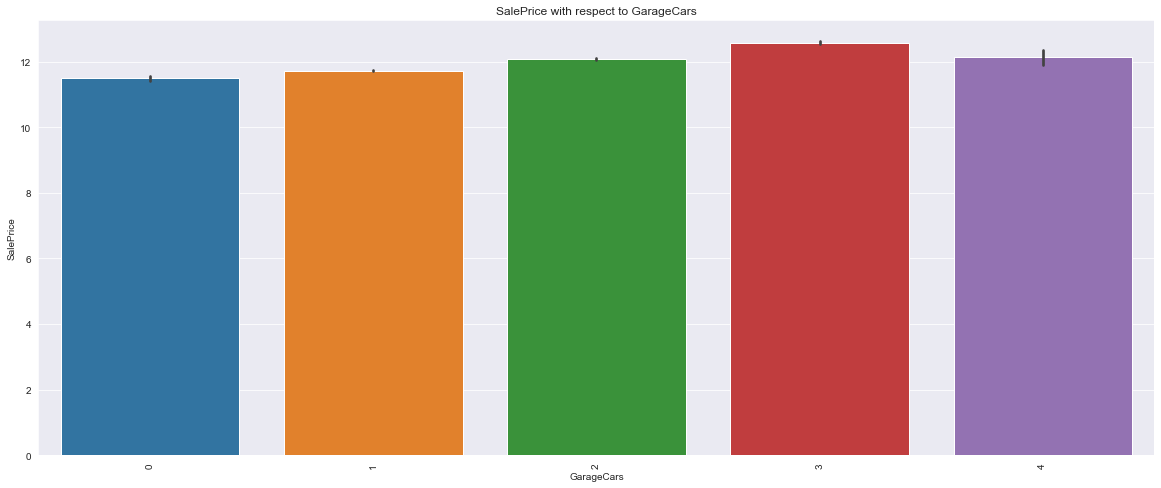

In [345]:
relativeplot('GarageCars','SalePrice')

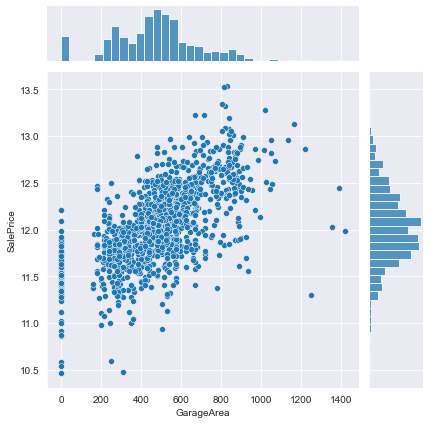

In [346]:
sns.jointplot(x='GarageArea', y='SalePrice', data=df)
plt.show()

In [347]:
#Now let us remove outliers
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

In [348]:
df = remove_outliers(df,'GrLivArea')

In [349]:
df = remove_outliers(df,'GarageArea')

In [350]:
df.shape

(1413, 81)

Now let us create a column Age which gives age of property


In [351]:
df['Age']=(df['YrSold'] - df['YearBuilt'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.00,8450,Pave,none,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,none,Attchd,"2,003.00",RFn,2,548,TA,TA,Y,0,61,0,0,0,0,none,none,none,0,2,2008,WD,Normal,12.25,5
1,2,20,RL,80.00,9600,Pave,none,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,"1,976.00",RFn,2,460,TA,TA,Y,298,0,0,0,0,0,none,none,none,0,5,2007,WD,Normal,12.11,31
2,3,60,RL,68.00,11250,Pave,none,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,"2,001.00",RFn,2,608,TA,TA,Y,0,42,0,0,0,0,none,none,none,0,9,2008,WD,Normal,12.32,7
3,4,70,RL,60.00,9550,Pave,none,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,"1,998.00",Unf,3,642,TA,TA,Y,0,35,272,0,0,0,none,none,none,0,2,2006,WD,Abnorml,11.85,91
4,5,60,RL,84.00,14260,Pave,none,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,"2,000.00",RFn,3,836,TA,TA,Y,192,84,0,0,0,0,none,none,none,0,12,2008,WD,Normal,12.43,8


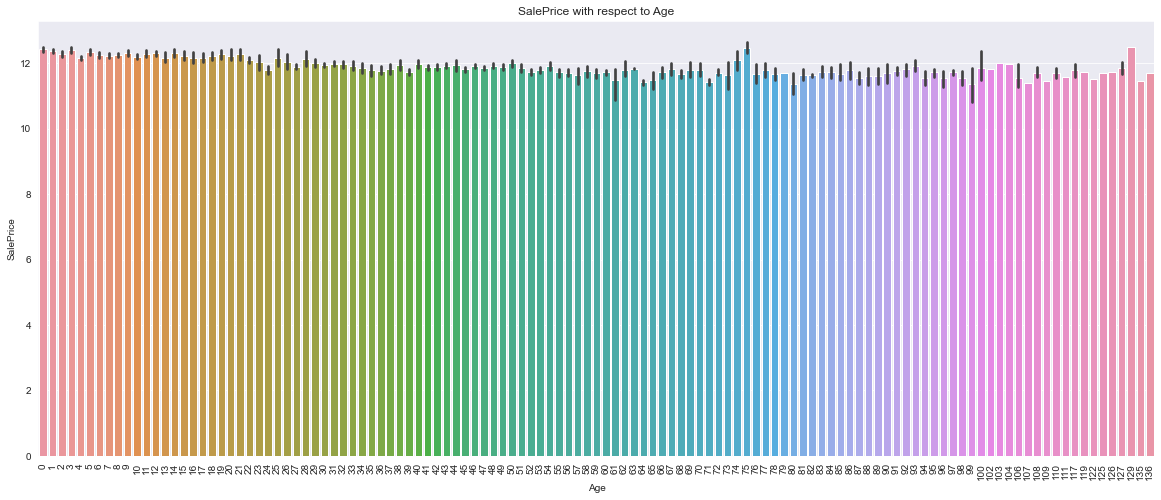

In [352]:
relativeplot('Age','SalePrice')

Now we can drop columns related to Age as they are not required anymore


In [353]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [354]:

df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.shape

(1413, 79)

Now let us create dummy variables for categorical variables

In [355]:
df = pd.get_dummies(df, drop_first=True )
df.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,65.00,8450,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,"2,003.00",2,548,0,61,0,0,0,0,0,2,12.25,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,80.00,9600,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,"1,976.00",2,460,298,0,0,0,0,0,0,5,12.11,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,68.00,11250,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,"2,001.00",2,608,0,42,0,0,0,0,0,9,12.32

## Model Building and Evaluation

In [356]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [357]:
df.fillna(999, inplace=True)

In [358]:
df = df.reset_index()

In [359]:
# X and Y 
X = df.drop(['SalePrice'], axis=1)

X.head()

,index,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,Age,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,Alley_none,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,...,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtQual_none,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_none,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_none,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType1_none,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtFinType2_none,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_Po,FireplaceQu_TA,FireplaceQu_none,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_none,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_none,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageQual_none,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,GarageCond_none,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_none,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_none,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_none,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,1,65.00,8450,196.00,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,"2,003.00",2,548,0,61,0,0,0,0,0,2,5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1,2,80.00,9600,0.00,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,"1,976.00",2,460,298,0,0,0,0,0,0,5,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,2,3,68.00,11250,162.00,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,"2,001.00",2,608,0,42,0,0,0,0,0,9,7,0,0,0,0,1,0,0

In [360]:
y = df['SalePrice']

y.head()

0   12.25
1   12.11
2   12.32
3   11.85
4   12.43
Name: SalePrice, dtype: float64

In [361]:
#Now lets split into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)



In [362]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()


In [363]:
# Creating a list of numerical columns to be scaled
num_cols = list(X_train.select_dtypes(include=['int64', 'float64']).columns)
num_cols

['index',
 'Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'Age']

In [364]:
# now let us scale the numerical columns 
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [365]:
# Let us define a function for checking metrics 
def show_metrics(y_train, y_train_pred, y_test, y_pred):
    
    metric = []
    
    print("R-Squared of Train data) =", '%.2f' % r2_score(y_train, y_train_pred))
    metric.append(r2_score(y_train, y_train_pred))
    print("R-Squared of Test data =", '%.2f' % r2_score(y_test, y_pred))
    metric.append(r2_score(y_test, y_pred))
    
    
    rss_train = np.sum(np.square(y_train - y_train_pred))
    metric.append(rss_train)
    rss_test = np.sum(np.square(y_test - y_pred))
    metric.append(rss_test)
    print("RSS of Train data =", '%.2f' % rss_train)
    print("RSS of Test data =", '%.2f' % rss_test)
    
    
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    metric.append(mse_train)
    mse_test = mean_squared_error(y_test, y_pred)
    metric.append(mse_test)
    print("MSE of Train data =", '%.2f' % mse_train)
    print("MSE of Test data =", '%.2f' % mse_test)
    

    
    # Root Mean Squared Error for train and test data
    rmse_train = mse_train**0.5
    metric.append(rmse_train)
    rmse_test = mse_test**0.5
    metric.append(rmse_test)
    print("RMSE of Train data =", '%.2f' % rmse_train) 
    print("RMSE of Test data =", '%.2f' % rmse_test) 
    

    return metric

In [366]:
x_train=X_train

In [367]:
x_test=X_test

In [368]:
y_test = np.nan_to_num(y_test)

In [369]:
y_train=np.nan_to_num(y_train)

In [370]:
X_train= np.nan_to_num(X_train)

In [371]:
X_test= np.nan_to_num(X_test)

## Ridge model

In [372]:

from sklearn.linear_model import Ridge, Lasso
#In order to create a Ridge Regression model, we can run  cross validation on a list of alpha values to find the optimum value of alpha

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

ridge = Ridge()

# cross validation

ridgeCV = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
ridgeCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [373]:
ridgeCV.best_params_

{'alpha': 7.0}

In [374]:
## View the results of cross validation search
ridgeCV.cv_results_

{'mean_fit_time': array([0.01336732, 0.01555839, 0.01316395, 0.0111732 , 0.01356111,
        0.0157588 , 0.01496038, 0.01535912, 0.01495905, 0.01216745,
        0.01416187, 0.01436186, 0.01655555, 0.01635666, 0.01515884,
        0.01695518, 0.01575761, 0.01655469, 0.01695423, 0.01575742,
        0.01615763, 0.01795316, 0.01815314, 0.02154341, 0.01835194,
        0.01934819, 0.01874862, 0.01575832]),
 'std_fit_time': array([0.00119816, 0.00048834, 0.00364552, 0.00097974, 0.00135367,
        0.00116222, 0.00063   , 0.00135298, 0.00109215, 0.0027067 ,
        0.00132205, 0.00101605, 0.00162062, 0.001017  , 0.00074554,
        0.00141047, 0.00132303, 0.00149257, 0.00109275, 0.00074695,
        0.00074636, 0.00126237, 0.00116357, 0.00319338, 0.00185032,
        0.00185003, 0.00239379, 0.00116353]),
 'mean_score_time': array([0.00139656, 0.0007977 , 0.00040312, 0.00059586, 0.00079846,
        0.00099759, 0.00099702, 0.00079808, 0.00099816, 0.0007988 ,
        0.00059881, 0.00099797, 0.000996

Hence our optimum alpha is 7,now let us build a ridge regression model

In [375]:
ridge = Ridge(alpha=7)

In [376]:
# Fitting the model on train data
ridge.fit(X_train, y_train)

Ridge(alpha=7)

In [377]:
#Now let us view the coefficients of ridge regression  model
ridge.coef_

array([-7.26171648e-04, -7.26171648e-04,  1.48748696e-04,  1.82281646e-02,
        4.73143979e-03,  2.44172487e-02,  1.29668946e-02,  2.77237404e-04,
        3.21676908e-02,  4.47167247e-02,  3.83830841e-02, -3.81456003e-03,
        7.06716716e-02,  9.50105152e-03,  1.10398155e-03,  1.41123147e-02,
        1.39051936e-02, -2.23837393e-03, -1.80452139e-02,  1.38893741e-02,
        1.26484283e-02, -1.42850513e-03,  2.58457986e-02,  7.94419811e-03,
        1.16020927e-02,  1.13120632e-02,  9.98243298e-03,  4.81361333e-03,
        1.03665146e-02,  3.59691115e-03,  4.31655593e-03, -1.98941617e-03,
       -6.36432049e-02, -2.11795456e-02, -5.41617722e-03, -2.00112096e-02,
        1.20711500e-02, -1.09815084e-02,  3.45046066e-02,  1.00428283e-02,
        2.38752178e-03,  8.28681122e-03, -8.30341714e-04, -6.95951693e-03,
       -5.44586887e-02, -3.39278124e-02,  1.14667780e-02,  6.96005451e-02,
        5.03383028e-02,  5.21724363e-02, -6.33766940e-05,  4.41813022e-02,
       -6.93974388e-03, -

In [378]:
#Now let us predict 
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)

In [379]:
#Evaluate using the metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared of Train data) = 0.94
R-Squared of Test data = 0.92
RSS of Train data = 9.06
RSS of Test data = 5.37
MSE of Train data = 0.01
MSE of Test data = 0.01
RMSE of Train data = 0.10
RMSE of Test data = 0.11


In [380]:
ridgeCV_results= pd.DataFrame(ridgeCV.cv_results_)
ridgeCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.01,0.00,0.00,0.00,0.00,{'alpha': 0.0001},-0.11,-0.10,-0.10,-0.09,-0.10,-0.10,0.01,26,-0.06,-0.06,-0.06,-0.06,-0.05,-0.06,0.00
1,0.02,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.11,-0.10,-0.10,-0.09,-0.10,-0.10,0.01,25,-0.06,-0.06,-0.06,-0.06,-0.05,-0.06,0.00
2,0.01,0.00,0.00,0.00,0.01,{'alpha': 0.01},-0.11,-0.10,-0.10,-0.09,-0.10,-0.10,0.01,24,-0.06,-0.06,-0.06,-0.06,-0.05,-0.06,0.00
3,0.01,0.00,0.00,0.00,0.05,{'alpha': 0.05},-0.11,-0.09,-0.10,-0.08,-0.10,-0.10,0.01,23,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
4,0.01,0.00,0.00,0.00,0.10,{'alpha': 0.1},-0.11,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,22,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
5,0.02,0.00,0.00,0.00,0.20,{'alpha': 0.2},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,20,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
6,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,19,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
7,0.02,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,18,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
8,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,17,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
9,0.01,0.00,0.00,0.00,0.60,{'alpha': 0.6},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.01,15,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00


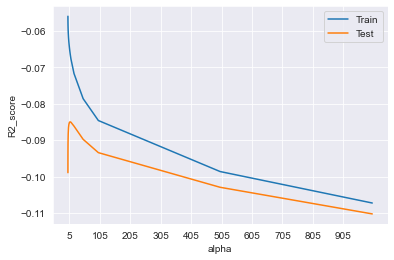

In [381]:
# Plot of R2 score vs alpha values
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_train_score'], label='Train')
plt.plot(ridgeCV_results['param_alpha'], ridgeCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.xticks(np.arange(5, 1000+1, 100))
plt.legend()
plt.show()

From the graph it can be seen that alpha of 7 is the optimum for both test and train

## Lasso model

In [382]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 117 out of 140 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [383]:
# Finding the optimum alpha
lassoCV.best_params_



{'alpha': 0.001}

In [384]:
# Results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.37021213, 0.08637047, 0.02812457, 0.02054586, 0.02114453,
        0.01555862, 0.01376352, 0.01635571, 0.01416292, 0.01755347,
        0.01556029, 0.01675391, 0.01436219, 0.01436286, 0.01555748,
        0.01276593, 0.01316457, 0.01416173, 0.01376309, 0.01535764,
        0.01376243, 0.01456203, 0.014361  , 0.01495986, 0.01476068,
        0.01675472, 0.01376505, 0.01376357]),
 'std_fit_time': array([0.03222078, 0.01784796, 0.00494261, 0.00249252, 0.00171588,
        0.00135311, 0.00116223, 0.00299868, 0.00116239, 0.00828597,
        0.00354463, 0.00358876, 0.0018493 , 0.00248999, 0.00205341,
        0.00039818, 0.00116323, 0.00239329, 0.00132333, 0.00232706,
        0.00116327, 0.00079806, 0.00119691, 0.00063015, 0.00039969,
        0.00146521, 0.00074609, 0.00074652]),
 'mean_score_time': array([0.00099654, 0.00099759, 0.00079732, 0.00119677, 0.00159607,
        0.00079761, 0.00099711, 0.00079856, 0.00139613, 0.00099635,
        0.0009963 , 0.00199566, 0.000997

So now we will build model using optimum alpha 0.001

In [385]:

lasso = Lasso(alpha=0.001)

In [386]:
# Fitting the model on train data
lasso.fit(X_train, y_train)

Lasso(alpha=0.001)

In [387]:
lasso.coef_

array([-1.57992904e-04, -1.68385696e-18, -0.00000000e+00,  1.18400334e-02,
        3.53495100e-03,  2.99864360e-02,  3.76413175e-03, -0.00000000e+00,
        4.48475677e-02,  6.27955903e-03,  0.00000000e+00, -9.37497981e-03,
        1.23147805e-01,  1.07015028e-02,  0.00000000e+00,  9.61447810e-03,
        9.67134641e-03, -6.92121474e-04, -2.38710711e-02,  1.48200375e-02,
        1.49590778e-02,  4.71319847e-03,  2.76933779e-02,  1.19513374e-02,
        1.21743083e-02,  1.26424933e-02,  8.77016724e-03,  4.62253913e-03,
        1.03590823e-02,  1.99162800e-03,  3.23474253e-03, -3.86932283e-04,
       -6.53302096e-02, -9.20654340e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -2.56965278e-04,  4.67803833e-03,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -2.88367415e-02, -0.00000000e+00,  0.00000000e+00,  4.91889079e-02,
        0.00000000e+00,  3.04229474e-02, -2.05635270e-02,  0.00000000e+00,
        0.00000000e+00, -

In [388]:
# Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [389]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared of Train data) = 0.92
R-Squared of Test data = 0.91
RSS of Train data = 11.36
RSS of Test data = 5.85
MSE of Train data = 0.01
MSE of Test data = 0.01
RMSE of Train data = 0.11
RMSE of Test data = 0.12


In [390]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.37,0.03,0.00,0.00,0.00,{'alpha': 0.0001},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.00,2,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.09,0.02,0.00,0.00,0.00,{'alpha': 0.001},-0.09,-0.09,-0.08,-0.09,-0.09,-0.09,0.00,1,-0.07,-0.07,-0.08,-0.07,-0.07,-0.07,0.00
2,0.03,0.00,0.00,0.00,0.01,{'alpha': 0.01},-0.11,-0.12,-0.10,-0.10,-0.11,-0.11,0.01,3,-0.10,-0.10,-0.11,-0.11,-0.10,-0.11,0.00
3,0.02,0.00,0.00,0.00,0.05,{'alpha': 0.05},-0.14,-0.14,-0.12,-0.12,-0.12,-0.13,0.01,4,-0.13,-0.13,-0.13,-0.13,-0.13,-0.13,0.00
4,0.02,0.00,0.00,0.00,0.10,{'alpha': 0.1},-0.17,-0.18,-0.15,-0.15,-0.16,-0.16,0.01,5,-0.16,-0.16,-0.16,-0.16,-0.16,-0.16,0.00
5,0.02,0.00,0.00,0.00,0.20,{'alpha': 0.2},-0.25,-0.28,-0.24,-0.24,-0.25,-0.25,0.01,6,-0.25,-0.25,-0.25,-0.25,-0.25,-0.25,0.00
6,0.01,0.00,0.00,0.00,0.30,{'alpha': 0.3},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
7,0.02,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
8,0.01,0.00,0.00,0.00,0.50,{'alpha': 0.5},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
9,0.02,0.01,0.00,0.00,0.60,{'alpha': 0.6},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00


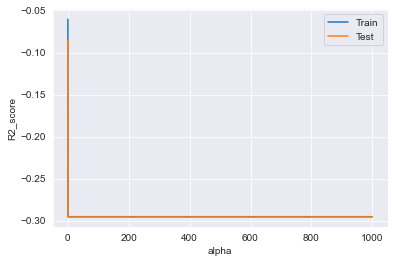

In [391]:
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_train_score'], label='Train')
plt.plot(lassoCV_results['param_alpha'], lassoCV_results['mean_test_score'], label='Test')
plt.xlabel('alpha')
plt.ylabel('R2_score')

plt.legend()
plt.show()

## Comparing Ridge and Lasso Regression models

In [392]:
pd.options.display.float_format = "{:,.2f}".format


In [393]:
# Let us create a table with metrics for both Lasso and Ridge
table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.94,0.92
R2 Score (Test),0.92,0.91
RSS (Train),9.06,11.36
RSS (Test),5.37,5.85
MSE (Train),0.01,0.01
MSE (Test),0.01,0.01
RMSE (Train),0.10,0.11
RMSE (Test),0.11,0.12


In [394]:
#Next let us observe the changes in coefficients after regression

In [395]:
var = pd.DataFrame(index=X.columns)
var.rows = X.columns
var

""
index
Id
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [396]:
var['Ridge'] = ridge.coef_
var['Lasso'] = lasso.coef_

In [397]:
var

,Ridge,Lasso
index,-0.00,-0.00
Id,-0.00,-0.00
LotFrontage,0.00,-0.00
LotArea,0.02,0.01
MasVnrArea,0.00,0.00
BsmtFinSF1,0.02,0.03
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,-0.00
TotalBsmtSF,0.03,0.04
1stFlrSF,0.04,0.01


In [398]:
var.loc[var['Lasso']!=0, 'Lasso']

index                  -0.00
Id                     -0.00
LotArea                 0.01
MasVnrArea              0.00
BsmtFinSF1              0.03
BsmtFinSF2              0.00
TotalBsmtSF             0.04
1stFlrSF                0.01
LowQualFinSF           -0.01
GrLivArea               0.12
BsmtFullBath            0.01
FullBath                0.01
HalfBath                0.01
BedroomAbvGr           -0.00
KitchenAbvGr           -0.02
TotRmsAbvGrd            0.01
Fireplaces              0.01
GarageYrBlt             0.00
GarageCars              0.03
GarageArea              0.01
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.01
3SsnPorch               0.00
ScreenPorch             0.01
PoolArea                0.00
MiscVal                 0.00
MoSold                 -0.00
Age                    -0.07
MSSubClass_30          -0.01
MSSubClass_60          -0.00
MSSubClass_70           0.00
MSSubClass_160         -0.03
MSZoning_FV             0.05
MSZoning_RL   

In [399]:
# Top 10 coefficients of Ridge regression 
var['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.10
OverallCond_9          0.09
Neighborhood_Crawfor   0.09
Functional_Typ         0.08
OverallCond_8          0.07
GrLivArea              0.07
MSZoning_FV            0.07
OverallQual_8          0.07
Exterior1st_BrkFace    0.07
Neighborhood_StoneBr   0.07
Name: Ridge, dtype: float64

In [400]:
# To interpret the ridge coefficients in terms of our target variable, we have to take inverse log 
ridge_coeffs = np.exp(var['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.10
OverallCond_9          1.09
Neighborhood_Crawfor   1.09
Functional_Typ         1.09
OverallCond_8          1.08
GrLivArea              1.07
MSZoning_FV            1.07
OverallQual_8          1.07
Exterior1st_BrkFace    1.07
Neighborhood_StoneBr   1.07
Name: Ridge, dtype: float64

In [401]:
#Now for lasso

In [402]:
var['Lasso'].sort_values(ascending=False)[:10]

OverallQual_9          0.14
GrLivArea              0.12
SaleType_New           0.12
Neighborhood_Crawfor   0.10
Functional_Typ         0.08
OverallQual_8          0.08
OverallCond_9          0.07
OverallCond_8          0.06
OverallCond_7          0.06
CentralAir_Y           0.06
Name: Lasso, dtype: float64

In [403]:
lasso_coeffs = np.exp(var['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.15
GrLivArea              1.13
SaleType_New           1.12
Neighborhood_Crawfor   1.11
Functional_Typ         1.09
OverallQual_8          1.08
OverallCond_9          1.07
OverallCond_8          1.06
OverallCond_7          1.06
CentralAir_Y           1.06
Name: Lasso, dtype: float64

## Observations
    -The important variables in determining the price of house are OverallQual_9, Neighborhood_Crawfor, OverallCond_9, Functional_Typ, OverallCond_8,GrLivArea,  OverallQual_8, MSZoning_FV, Exterior1st_BrkFace, Neiighborhood_StoneBr as we will proceed with Ridge regression
        -GrLivArea: If above grade (ground) living area increases by one square feet the price will increase by 1.07 times
        - Neighborhood_Crawfor : If neighborhood is Crawford, price increases by 1.09 times
        - OverallCond : If overall condition is 8 or 9, price increases by 1.08 and 1.09 times respectively
        - FunctionalTyp : If house is of typical functionality, price increases by 1.09 times
        - OverallQual : If overall quality is 8, price increases by 1.07 times
    -Optimal value of alpha for ridge : 7, alpha : 0.001
    - R2 square for Ridge model : 0.92, Lasso : 0.91


# Subjective Questions

Question 1

In [404]:
 ridge1 = Ridge(alpha=14)

In [405]:
# Fitting the model on train data
ridge1.fit(X_train, y_train)

Ridge(alpha=14)

In [406]:
#Now let us view the coefficients of ridge regression  model
ridge1.coef_

array([-8.17582128e-04, -8.17582128e-04, -1.05951656e-04,  1.59235436e-02,
        5.31079182e-03,  2.68027375e-02,  1.14993376e-02,  8.55333690e-04,
        3.47838069e-02,  4.34511834e-02,  3.87519586e-02, -4.86593905e-03,
        6.99172278e-02,  8.89006031e-03,  1.32525924e-03,  1.42419258e-02,
        1.51244872e-02, -2.86329724e-03, -2.00823320e-02,  1.65657183e-02,
        1.43413994e-02,  1.82822572e-03,  2.61623107e-02,  1.02438245e-02,
        1.20446418e-02,  1.20010600e-02,  8.97819420e-03,  5.33710201e-03,
        9.98506896e-03,  3.59561900e-03,  4.72335073e-03, -1.26439770e-03,
       -5.91627559e-02, -2.18026888e-02, -2.36564591e-03, -1.11099206e-02,
        7.78226249e-03, -1.10846714e-02,  3.17506854e-02,  7.40426860e-03,
        5.56513806e-03,  8.95605614e-03, -3.95042469e-04, -1.85929379e-03,
       -4.43339263e-02, -2.60204351e-02,  1.08306666e-02,  4.74183108e-02,
        2.91350926e-02,  4.11623830e-02, -1.65152548e-02,  2.81870068e-02,
       -2.55702734e-03, -

In [407]:
#Now let us predict 
y_train_pred = ridge1.predict(X_train)
y_pred = ridge1.predict(X_test)

In [408]:
#Evaluate using the metrics
ridge_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared of Train data) = 0.93
R-Squared of Test data = 0.91
RSS of Train data = 9.87
RSS of Test data = 5.51
MSE of Train data = 0.01
MSE of Test data = 0.01
RMSE of Train data = 0.10
RMSE of Test data = 0.11


In [409]:

lasso = Lasso(alpha=0.002)

In [410]:
# Fitting the model on train data
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [411]:
lasso.coef_

array([-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  1.17861884e-02,
        2.49455662e-03,  3.34918812e-02,  2.03593890e-03, -0.00000000e+00,
        4.86932288e-02,  5.13917889e-03,  0.00000000e+00, -1.04784213e-02,
        1.30444300e-01,  7.90397076e-03,  0.00000000e+00,  6.56192230e-03,
        8.34381545e-03, -1.25027988e-03, -2.57039484e-02,  1.36033240e-02,
        1.75565422e-02,  6.23264380e-03,  2.96835579e-02,  1.66880451e-02,
        1.15035615e-02,  1.40081102e-02,  5.37740536e-03,  4.22133113e-03,
        9.64514221e-03,  6.49224213e-04,  3.80043448e-03, -0.00000000e+00,
       -6.62191299e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -1.32704250e-05, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.04049887e-03, -4.13795475e-02,  0.00000000e+00,
        0.00000000e+00, -

In [412]:
# Making predictions
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

In [413]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared of Train data) = 0.90
R-Squared of Test data = 0.89
RSS of Train data = 13.63
RSS of Test data = 6.80
MSE of Train data = 0.01
MSE of Test data = 0.02
RMSE of Train data = 0.12
RMSE of Test data = 0.13


In [414]:
# Let us create a table with metrics for both Lasso and Ridge
table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)', 'RMSE (Train)', 'RMSE (Test)'],
            'Ridge Regression' : ridge_metrics,
            'Lasso Regression' : lasso_metrics
        }

final_metric = pd.DataFrame(table, columns = ['Metric', 'Ridge Regression', 'Lasso Regression'] )
final_metric.set_index('Metric')

,Ridge Regression,Lasso Regression
Metric,,
R2 Score (Train),0.93,0.90
R2 Score (Test),0.91,0.89
RSS (Train),9.87,13.63
RSS (Test),5.51,6.80
MSE (Train),0.01,0.01
MSE (Test),0.01,0.02
RMSE (Train),0.10,0.12
RMSE (Test),0.11,0.13


In [415]:
#Next let us observe the changes in coefficients after regression

In [416]:
var = pd.DataFrame(index=X.columns)
var.rows = X.columns
var

""
index
Id
LotFrontage
LotArea
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF


In [417]:
var['Ridge'] = ridge.coef_
var['Lasso'] = lasso.coef_

In [418]:
var

,Ridge,Lasso
index,-0.00,-0.00
Id,-0.00,-0.00
LotFrontage,0.00,-0.00
LotArea,0.02,0.01
MasVnrArea,0.00,0.00
BsmtFinSF1,0.02,0.03
BsmtFinSF2,0.01,0.00
BsmtUnfSF,0.00,-0.00
TotalBsmtSF,0.03,0.05
1stFlrSF,0.04,0.01


In [419]:
var.loc[var['Lasso']!=0, 'Lasso']

LotArea                 0.01
MasVnrArea              0.00
BsmtFinSF1              0.03
BsmtFinSF2              0.00
TotalBsmtSF             0.05
1stFlrSF                0.01
LowQualFinSF           -0.01
GrLivArea               0.13
BsmtFullBath            0.01
FullBath                0.01
HalfBath                0.01
BedroomAbvGr           -0.00
KitchenAbvGr           -0.03
TotRmsAbvGrd            0.01
Fireplaces              0.02
GarageYrBlt             0.01
GarageCars              0.03
GarageArea              0.02
WoodDeckSF              0.01
OpenPorchSF             0.01
EnclosedPorch           0.01
3SsnPorch               0.00
ScreenPorch             0.01
PoolArea                0.00
MiscVal                 0.00
Age                    -0.07
MSSubClass_160         -0.00
MSZoning_RL             0.01
MSZoning_RM            -0.04
LotShape_Reg           -0.01
LotConfig_CulDSac       0.00
LotConfig_Inside       -0.01
Neighborhood_Crawfor    0.09
Neighborhood_Edwards   -0.01
Neighborhood_I

In [420]:
# Top 10 coefficients of Ridge regression 
var['Ridge'].sort_values(ascending=False)[:10]

OverallQual_9          0.10
OverallCond_9          0.09
Neighborhood_Crawfor   0.09
Functional_Typ         0.08
OverallCond_8          0.07
GrLivArea              0.07
MSZoning_FV            0.07
OverallQual_8          0.07
Exterior1st_BrkFace    0.07
Neighborhood_StoneBr   0.07
Name: Ridge, dtype: float64

In [421]:
# To interpret the ridge coefficients in terms of our target variable, we have to take inverse log 
ridge_coeffs = np.exp(var['Ridge'])
ridge_coeffs.sort_values(ascending=False)[:10]

OverallQual_9          1.10
OverallCond_9          1.09
Neighborhood_Crawfor   1.09
Functional_Typ         1.09
OverallCond_8          1.08
GrLivArea              1.07
MSZoning_FV            1.07
OverallQual_8          1.07
Exterior1st_BrkFace    1.07
Neighborhood_StoneBr   1.07
Name: Ridge, dtype: float64

In [422]:
#Now for lasso

In [423]:
var['Lasso'].sort_values(ascending=False)[:10]

GrLivArea              0.13
SaleType_New           0.10
OverallQual_9          0.09
Neighborhood_Crawfor   0.09
Functional_Typ         0.08
CentralAir_Y           0.06
OverallCond_7          0.06
OverallQual_8          0.06
TotalBsmtSF            0.05
OverallCond_8          0.04
Name: Lasso, dtype: float64

In [424]:
lasso_coeffs = np.exp(var['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

GrLivArea              1.14
SaleType_New           1.10
OverallQual_9          1.10
Neighborhood_Crawfor   1.09
Functional_Typ         1.08
CentralAir_Y           1.06
OverallCond_7          1.06
OverallQual_8          1.06
TotalBsmtSF            1.05
OverallCond_8          1.05
Name: Lasso, dtype: float64

Question 3

In [425]:
lasso_top_5 = ['OverallQual_9','GrLivArea','SaleType_New','Neighborhood_Crawfor','Functional_Typ'] 


In [426]:
X_train_drop=x_train.drop(lasso_top_5,axis=1)

In [427]:
X_test_drop=x_test.drop(lasso_top_5,axis=1)

## Lasso model

In [459]:

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,
                    2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}

lasso = Lasso()

# cross validation

lassoCV = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1, n_jobs=-1)            
lassoCV.fit(X_train_drop, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 117 out of 140 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.4s finished


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [460]:
# Finding the optimum alpha
lassoCV.best_params_



{'alpha': 0.001}

In [461]:
# Results of cross validation search
lassoCV.cv_results_

{'mean_fit_time': array([0.12805796, 0.03570571, 0.02952127, 0.0219419 , 0.01974707,
        0.0155581 , 0.01635556, 0.01316423, 0.01455913, 0.01555839,
        0.01715465, 0.01675658, 0.02094436, 0.01675587, 0.01815162,
        0.01436152, 0.01515965, 0.01695499, 0.01495934, 0.01456137,
        0.01755362, 0.01755342, 0.01535892, 0.0161571 , 0.01516008,
        0.01495953, 0.01476011, 0.01416197]),
 'std_fit_time': array([0.0362334 , 0.00270529, 0.00510971, 0.00302564, 0.00247568,
        0.00101739, 0.00586954, 0.0003995 , 0.00241061, 0.00101769,
        0.00193357, 0.00305191, 0.00735629, 0.00203371, 0.00443343,
        0.0013524 , 0.0014662 , 0.00166932, 0.00109219, 0.00214846,
        0.00079789, 0.00184965, 0.00214842, 0.00193463, 0.00203377,
        0.00141114, 0.00039916, 0.0011644 ]),
 'mean_score_time': array([0.00478673, 0.00498743, 0.00937419, 0.00478654, 0.00518632,
        0.00498614, 0.00558591, 0.00478806, 0.00957456, 0.00518565,
        0.00478592, 0.00538483, 0.005385

So now we will build model using optimum alpha 0.001

In [462]:

lasso = Lasso(alpha=0.001)

In [463]:
# Fitting the model on train data
lasso.fit(X_train_drop, y_train)

Lasso(alpha=0.001)

In [464]:
lasso.coef_

array([-0.        , -0.        , -0.00071192,  0.0115182 ,  0.00476199,
        0.03285058,  0.00295974, -0.        ,  0.05397764,  0.09092923,
        0.11080864, -0.        ,  0.00842478,  0.        ,  0.00725809,
        0.0107538 , -0.00103927, -0.02247266,  0.02107305,  0.01906179,
        0.00482976,  0.03042853,  0.00797442,  0.0111209 ,  0.01146024,
        0.00892571,  0.00561233,  0.01062669,  0.00179377,  0.00212207,
       -0.        , -0.06694445, -0.00184026, -0.        , -0.        ,
        0.        , -0.01222995,  0.03061722,  0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.04798884, -0.        ,
        0.        ,  0.05386627,  0.        ,  0.02764222, -0.03951037,
        0.        ,  0.        , -0.        , -0.        ,  0.        ,
       -0.00385128,  0.0197951 , -0.        , -0.        , -0.        ,
        0.01946336, -0.        , -0.        , -0.00719536,  0.        ,
       -0.        ,  0.        , -0.        ,  0.00607836,  0.  

In [465]:
# Making predictions
y_train_pred = lasso.predict(X_train_drop)
y_pred = lasso.predict(X_test_drop)

In [466]:
lasso_metrics = show_metrics(y_train, y_train_pred, y_test, y_pred)

R-Squared of Train data) = 0.91
R-Squared of Test data = 0.90
RSS of Train data = 12.29
RSS of Test data = 6.21
MSE of Train data = 0.01
MSE of Test data = 0.01
RMSE of Train data = 0.11
RMSE of Test data = 0.12


In [467]:
lassoCV_results= pd.DataFrame(lassoCV.cv_results_)
lassoCV_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.13,0.04,0.00,0.00,0.00,{'alpha': 0.0001},-0.10,-0.09,-0.09,-0.08,-0.09,-0.09,0.00,2,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,0.00
1,0.04,0.00,0.00,0.00,0.00,{'alpha': 0.001},-0.09,-0.09,-0.09,-0.09,-0.09,-0.09,0.00,1,-0.08,-0.08,-0.08,-0.08,-0.07,-0.08,0.00
2,0.03,0.01,0.01,0.01,0.01,{'alpha': 0.01},-0.11,-0.12,-0.10,-0.10,-0.11,-0.11,0.01,3,-0.10,-0.10,-0.11,-0.11,-0.10,-0.10,0.00
3,0.02,0.00,0.00,0.00,0.05,{'alpha': 0.05},-0.14,-0.16,-0.13,-0.13,-0.13,-0.14,0.01,4,-0.13,-0.14,-0.14,-0.14,-0.14,-0.14,0.00
4,0.02,0.00,0.01,0.00,0.10,{'alpha': 0.1},-0.19,-0.20,-0.18,-0.17,-0.18,-0.18,0.01,5,-0.18,-0.18,-0.18,-0.18,-0.18,-0.18,0.00
5,0.02,0.00,0.00,0.00,0.20,{'alpha': 0.2},-0.26,-0.29,-0.26,-0.26,-0.26,-0.27,0.01,6,-0.26,-0.27,-0.27,-0.27,-0.26,-0.27,0.00
6,0.02,0.01,0.01,0.00,0.30,{'alpha': 0.3},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
7,0.01,0.00,0.00,0.00,0.40,{'alpha': 0.4},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
8,0.01,0.00,0.01,0.01,0.50,{'alpha': 0.5},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00
9,0.02,0.00,0.01,0.00,0.60,{'alpha': 0.6},-0.29,-0.32,-0.29,-0.29,-0.29,-0.30,0.01,7,-0.30,-0.29,-0.30,-0.30,-0.30,-0.30,0.00


In [469]:
#Next let us observe the changes in coefficients after regression

In [474]:
var = pd.DataFrame(index=X_train_drop.columns)
var.rows = X_train_drop.columns
var.shape

(277, 0)

In [476]:

var['Lasso'] = lasso.coef_

In [477]:
var

,Lasso
index,-0.00
Id,-0.00
LotFrontage,-0.00
LotArea,0.01
MasVnrArea,0.00
BsmtFinSF1,0.03
BsmtFinSF2,0.00
BsmtUnfSF,-0.00
TotalBsmtSF,0.05
1stFlrSF,0.09


In [478]:
var.loc[var['Lasso']!=0, 'Lasso']

LotFrontage             -0.00
LotArea                  0.01
MasVnrArea               0.00
BsmtFinSF1               0.03
BsmtFinSF2               0.00
TotalBsmtSF              0.05
1stFlrSF                 0.09
2ndFlrSF                 0.11
BsmtFullBath             0.01
FullBath                 0.01
HalfBath                 0.01
BedroomAbvGr            -0.00
KitchenAbvGr            -0.02
TotRmsAbvGrd             0.02
Fireplaces               0.02
GarageYrBlt              0.00
GarageCars               0.03
GarageArea               0.01
WoodDeckSF               0.01
OpenPorchSF              0.01
EnclosedPorch            0.01
3SsnPorch                0.01
ScreenPorch              0.01
PoolArea                 0.00
MiscVal                  0.00
Age                     -0.07
MSSubClass_30           -0.00
MSSubClass_60           -0.01
MSSubClass_70            0.03
MSSubClass_160          -0.05
MSZoning_FV              0.05
MSZoning_RL              0.03
MSZoning_RM             -0.04
LotShape_R

In [447]:
#Now for lasso

In [479]:
var['Lasso'].sort_values(ascending=False)[:10]

2ndFlrSF                0.11
SaleCondition_Partial   0.10
1stFlrSF                0.09
OverallCond_9           0.09
OverallCond_8           0.07
OverallCond_7           0.06
CentralAir_Y            0.06
TotalBsmtSF             0.05
MSZoning_FV             0.05
SaleCondition_Normal    0.05
Name: Lasso, dtype: float64

In [480]:
lasso_coeffs = np.exp(var['Lasso'])
lasso_coeffs.sort_values(ascending=False)[:10]

2ndFlrSF                1.12
SaleCondition_Partial   1.11
1stFlrSF                1.10
OverallCond_9           1.09
OverallCond_8           1.07
OverallCond_7           1.06
CentralAir_Y            1.06
TotalBsmtSF             1.06
MSZoning_FV             1.06
SaleCondition_Normal    1.05
Name: Lasso, dtype: float64

After dropping top 5 predictors, new predictors are :


2ndFlrSF                
SaleCondition_Partial   
1stFlrSF                
OverallCond_9          
OverallCond_8           
OverallCond_7           
CentralAir_Y            
TotalBsmtSF            
MSZoning_FV            
SaleCondition_Normal  